In [1]:
import pandas as pd
from pandas import DataFrame,Series
xlsfile = pd.ExcelFile("top2018.xlsx")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm

In [2]:
dframe = xlsfile.parse('top2018')

In [3]:
dframe

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9211.00,1.0,0.1090,0.0332,0.000083,0.5520,0.3570,77169.00,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.88,1.0,0.1450,0.2580,0.003720,0.1230,0.4730,75023.00,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.09,0.0,0.0898,0.1170,0.000066,0.1310,0.1400,159847.00,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8011.00,1.0,0.1170,0.5800,0.000000,0.1120,0.4390,140124.00,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5833.00,1.0,0.1250,0.0589,0.000060,0.3960,0.3500,91.03,217925.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,630sXRhIcfwr2e4RdNtjK,Rewrite The Stars,Zac Efron,0.684,0.619,10.0,-7005.00,1.0,0.0386,0.0716,0.000000,0.1220,0.2840,125046.00,217440.0,4.0
96,2xmrfQpmS2iJExTlklLoA,I Miss You (feat. Julia Michaels),Clean Bandit,0.638,0.658,3.0,-6318.00,1.0,0.0456,0.2450,0.000004,0.0919,0.3300,105076.00,205748.0,4.0
97,5WvAo7DNuPRmk4APhdPzi,No Brainer,DJ Khaled,0.552,0.760,0.0,-4706.00,1.0,0.3420,0.0733,0.000000,0.0865,0.6390,135702.00,260000.0,5.0
98,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6593.00,0.0,0.0390,0.1010,0.000001,0.1060,0.0967,180043.00,239000.0,4.0


In [4]:
dframe.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

Find the mean in each factors and also the standard deviation. Determine which values are acceptable and which are not. Create a range of points based on the values above. If the values are very close to the mean, the point will be 2. If the values are still acceptable within the range, the point will be 1. Other than that the point will be 0. Hypothesis: a song will have better rank if it has better points (the total points).

The mean from every columns:

In [5]:
dframe.mean(axis=0)

danceability             0.716460
energy                   0.659060
key                      5.330000
loudness             -5054.064200
mode                     0.590000
speechiness              0.115569
acousticness             0.195701
instrumentalness         0.001584
liveness                 0.158302
valence                  0.484443
tempo               109684.010400
duration_ms         205206.780000
time_signature           3.980000
dtype: float64

Standard deviation sample from every columns:

In [6]:
dframe.std(axis=0)

danceability            0.131070
energy                  0.145067
key                     3.676447
loudness             2374.077016
mode                    0.494311
speechiness             0.104527
acousticness            0.220946
instrumentalness        0.013449
liveness                0.111662
valence                 0.206145
tempo               45970.926452
duration_ms         40007.893404
time_signature          0.200000
dtype: float64

Now that we already have the mean and sample standard deviation from every columns, we determine which values are allowed and which values are not allowed. The values that are allowed are the values that exist within 30% to the left from the mean and 30 % to the right from the mean on the normal distribution curve.

Such values will be calculated in excel as i don't have any knowledge on how to do norm.inv (excel formula) in pandas.

In [7]:
dframe_factors = xlsfile.parse('Sheet1')

In [8]:
dframe_factors

,factors,mean,standard deviation,min_value0.1,max_value0.1,min_value0.3,max_value0.3,min_value0.2,max_value0.2
0,danceability,0.716400,0.131070,0.683194,0.749606,0.606089,0.826711,0.647667,0.785133
1,energy,0.659060,0.145067,0.622308,0.695812,0.536969,0.781151,0.582987,0.735133
2,key,5.330000,3.676447,4.398583,6.261417,2.235824,8.424176,3.402069,7.257931
3,loudness,-5054.064200,2374.077016,-5655.529735,-4452.598665,-7052.137827,-3055.990573,-6299.031404,-3809.096996
4,mode,0.590000,0.494311,0.464768,0.715232,0.173977,1.006023,0.330783,0.849217
5,speechiness,0.115569,0.104527,0.089087,0.142051,0.027597,0.203541,0.060755,0.170383
6,acousticness,0.195701,0.220946,0.139725,0.251677,0.009748,0.381654,0.079837,0.311565
7,instrumentalness,0.001584,0.013449,-0.001823,0.004991,-0.009735,0.012903,-0.005469,0.008637
8,liveness,0.158302,0.111662,0.130013,0.186591,0.064325,0.252279,0.099746,0.216858
9,valence,0.484443,0.206145,0.432217,0.536669,0.310947,0.657939,0.376340,0.592546


In [9]:
dframe_factors.iloc[0]['mean']

0.7164

In [10]:
list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']
value = []
for i in range(100):
    subvalue = []
    index = 0
    for j in range(13):
        num = dframe.iloc[i][list_of_factors[index]]
        if dframe_factors.iloc[j]['mean'] == num:
            subvalue.append(2)
        elif dframe_factors.iloc[j]['min_value0.3'] <= num <=dframe_factors.iloc[j]['max_value0.3']:
            subvalue.append(1)
        else:
            subvalue.append(0)
        index += 1
    value.append(sum(subvalue))

In [11]:
value

[10,
 11,
 7,
 11,
 9,
 12,
 10,
 9,
 12,
 9,
 11,
 7,
 10,
 10,
 12,
 13,
 10,
 7,
 7,
 8,
 11,
 6,
 9,
 8,
 10,
 9,
 13,
 9,
 4,
 6,
 10,
 10,
 9,
 8,
 11,
 8,
 11,
 8,
 7,
 12,
 9,
 8,
 8,
 6,
 9,
 8,
 9,
 12,
 12,
 8,
 8,
 10,
 9,
 11,
 10,
 8,
 10,
 10,
 8,
 10,
 10,
 8,
 8,
 12,
 11,
 10,
 9,
 11,
 12,
 7,
 12,
 8,
 11,
 10,
 8,
 11,
 11,
 8,
 7,
 9,
 7,
 8,
 8,
 12,
 6,
 8,
 12,
 9,
 11,
 10,
 10,
 7,
 7,
 6,
 8,
 11,
 13,
 8,
 6,
 10]

In [12]:
df_result = pd.DataFrame({'songs': value}, index = [i for i in range(1,101)])

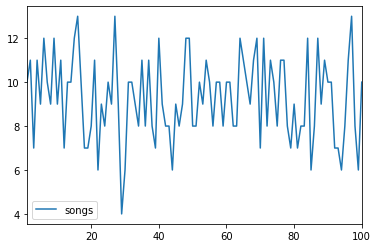

In [13]:
lines = df_result.plot.line()

The x axis from the line graph above is the ranking of the songs, while the y axis contains the amount of points that each songs has.

It turns out that there's no trendline since the points are very scattered. Let's find out how the curve looks from each determined factors. For the purpose of accuracy, we will separate the point categories into 5 groups. The value that equals the mean will get 4 points. The value that exist between 10% from the mean to the left and 10% from the mean to the right will get 3 points. The value that exist between 20% from the mean to the left and 20% from the mean to the right will get 2 points. The value that exist between 30% from the mean to the left and 30% from the mean to the right will get 1 point. Else, it will get 0 points.

In [69]:
slope_result = []

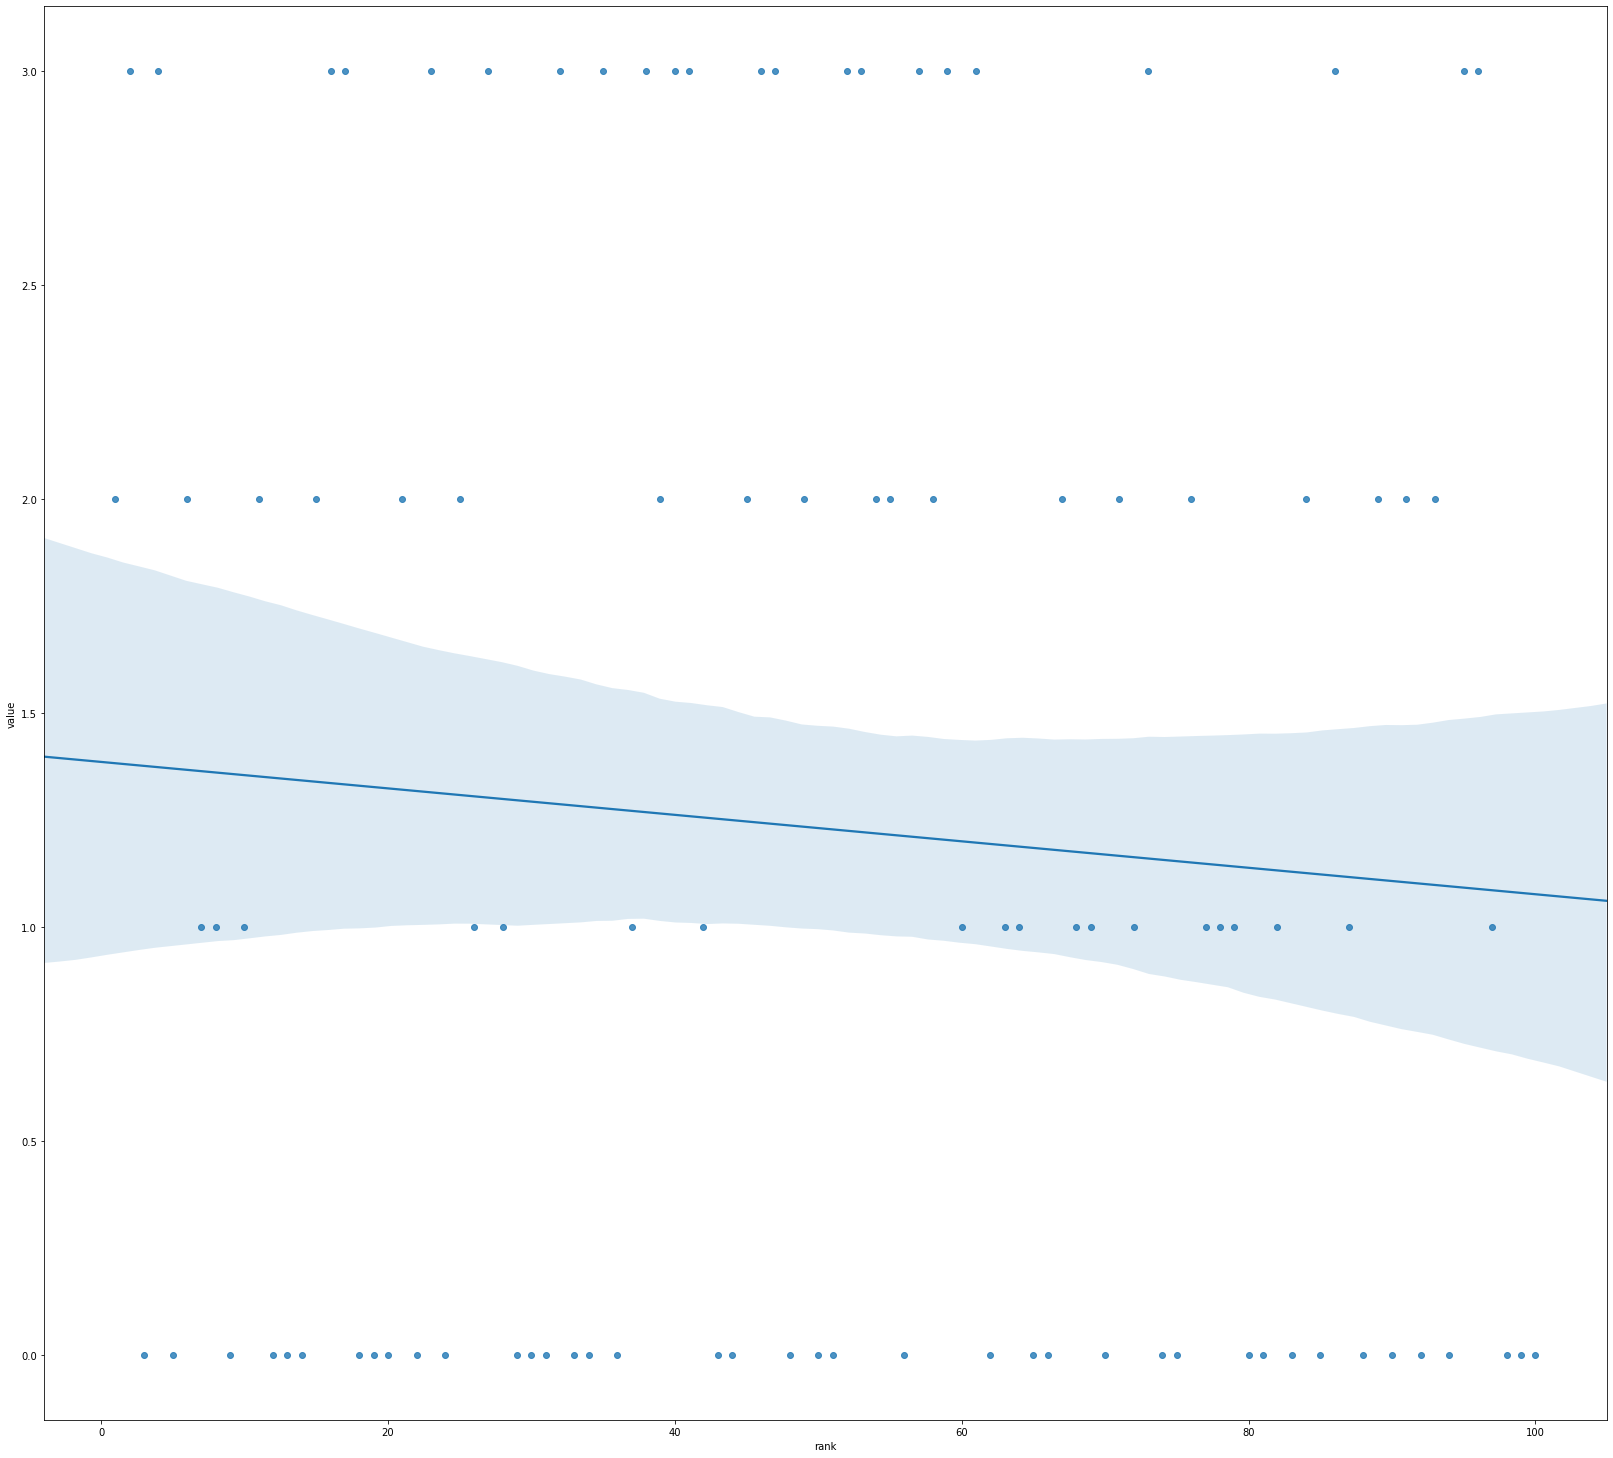

In [70]:
#danceability

list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

value = []
for j in range(100):
    subvalue = 0
    num = dframe.iloc[j][list_of_factors[0]]
    if num == dframe_factors.iloc[0]['mean']:
        subvalue += 4
    elif dframe_factors.iloc[0]['min_value0.1'] <= num <= dframe_factors.iloc[0]['max_value0.1']:
        subvalue += 3
    elif dframe_factors.iloc[0]['min_value0.2'] <= num <= dframe_factors.iloc[0]['max_value0.2']:
        subvalue += 2
    elif dframe_factors.iloc[0]['min_value0.3'] <= num <= dframe_factors.iloc[0]['max_value0.3']:
        subvalue += 1
    else:
        subvalue += 0
    value.append(subvalue)
    
data = pd.DataFrame({'rank': [i for i in range(1,101)],
                     'value': [i for i in value]})

p = sns.regplot(x='rank',y='value',data=data, fit_reg=True)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
slope_result.append(slope)

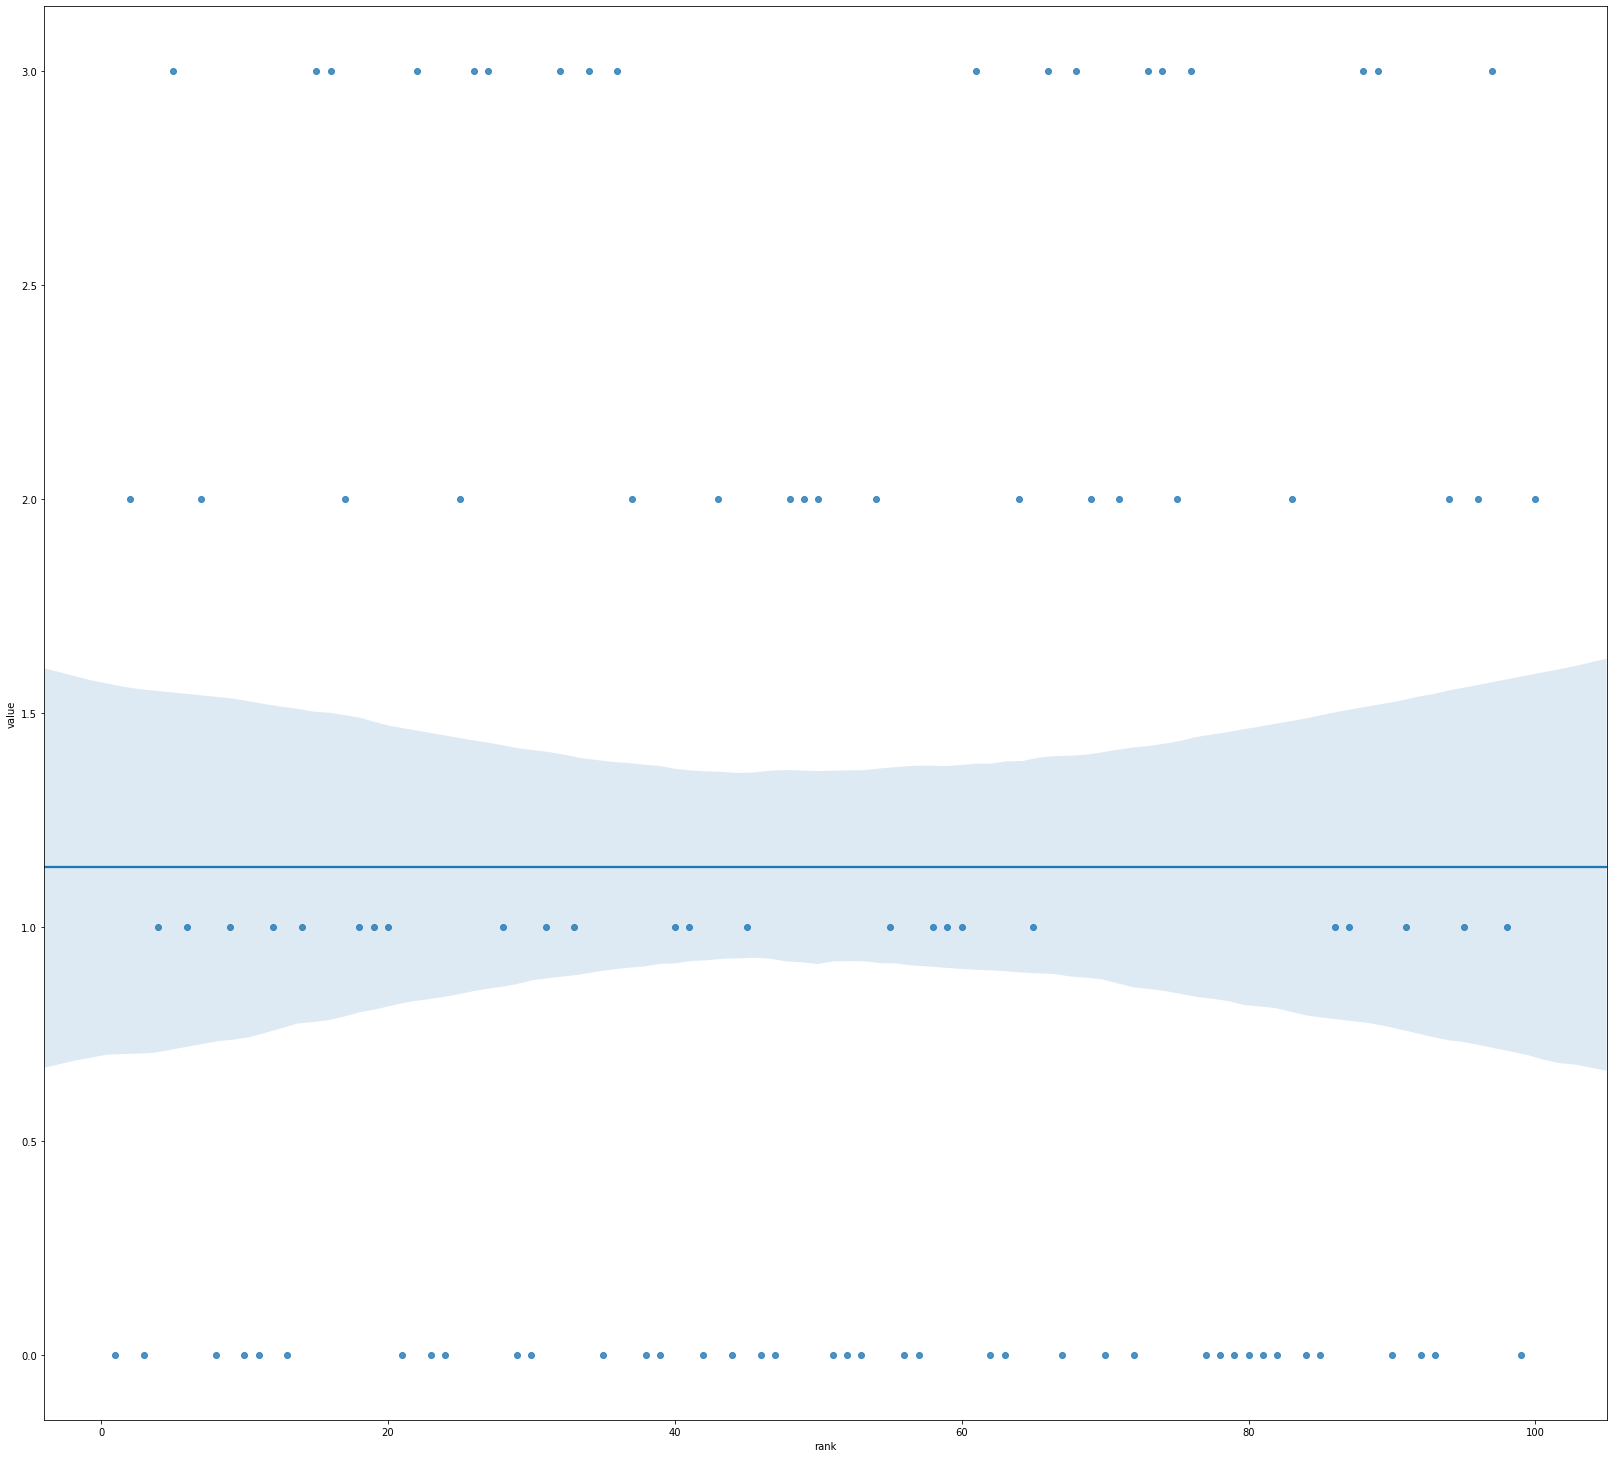

In [71]:
#energy

list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

value = []
for j in range(100):
    subvalue = 0
    num = dframe.iloc[j][list_of_factors[1]]
    if num == dframe_factors.iloc[1]['mean']:
        subvalue += 4
    elif dframe_factors.iloc[1]['min_value0.1'] <= num <= dframe_factors.iloc[1]['max_value0.1']:
        subvalue += 3
    elif dframe_factors.iloc[1]['min_value0.2'] <= num <= dframe_factors.iloc[1]['max_value0.2']:
        subvalue += 2
    elif dframe_factors.iloc[1]['min_value0.3'] <= num <= dframe_factors.iloc[1]['max_value0.3']:
        subvalue += 1
    else:
        subvalue += 0
    value.append(subvalue)
    
data = pd.DataFrame({'rank': [i for i in range(1,101)],
                     'value': [i for i in value]})

p = sns.regplot(x='rank',y='value',data=data, fit_reg=True)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
slope_result.append(slope)

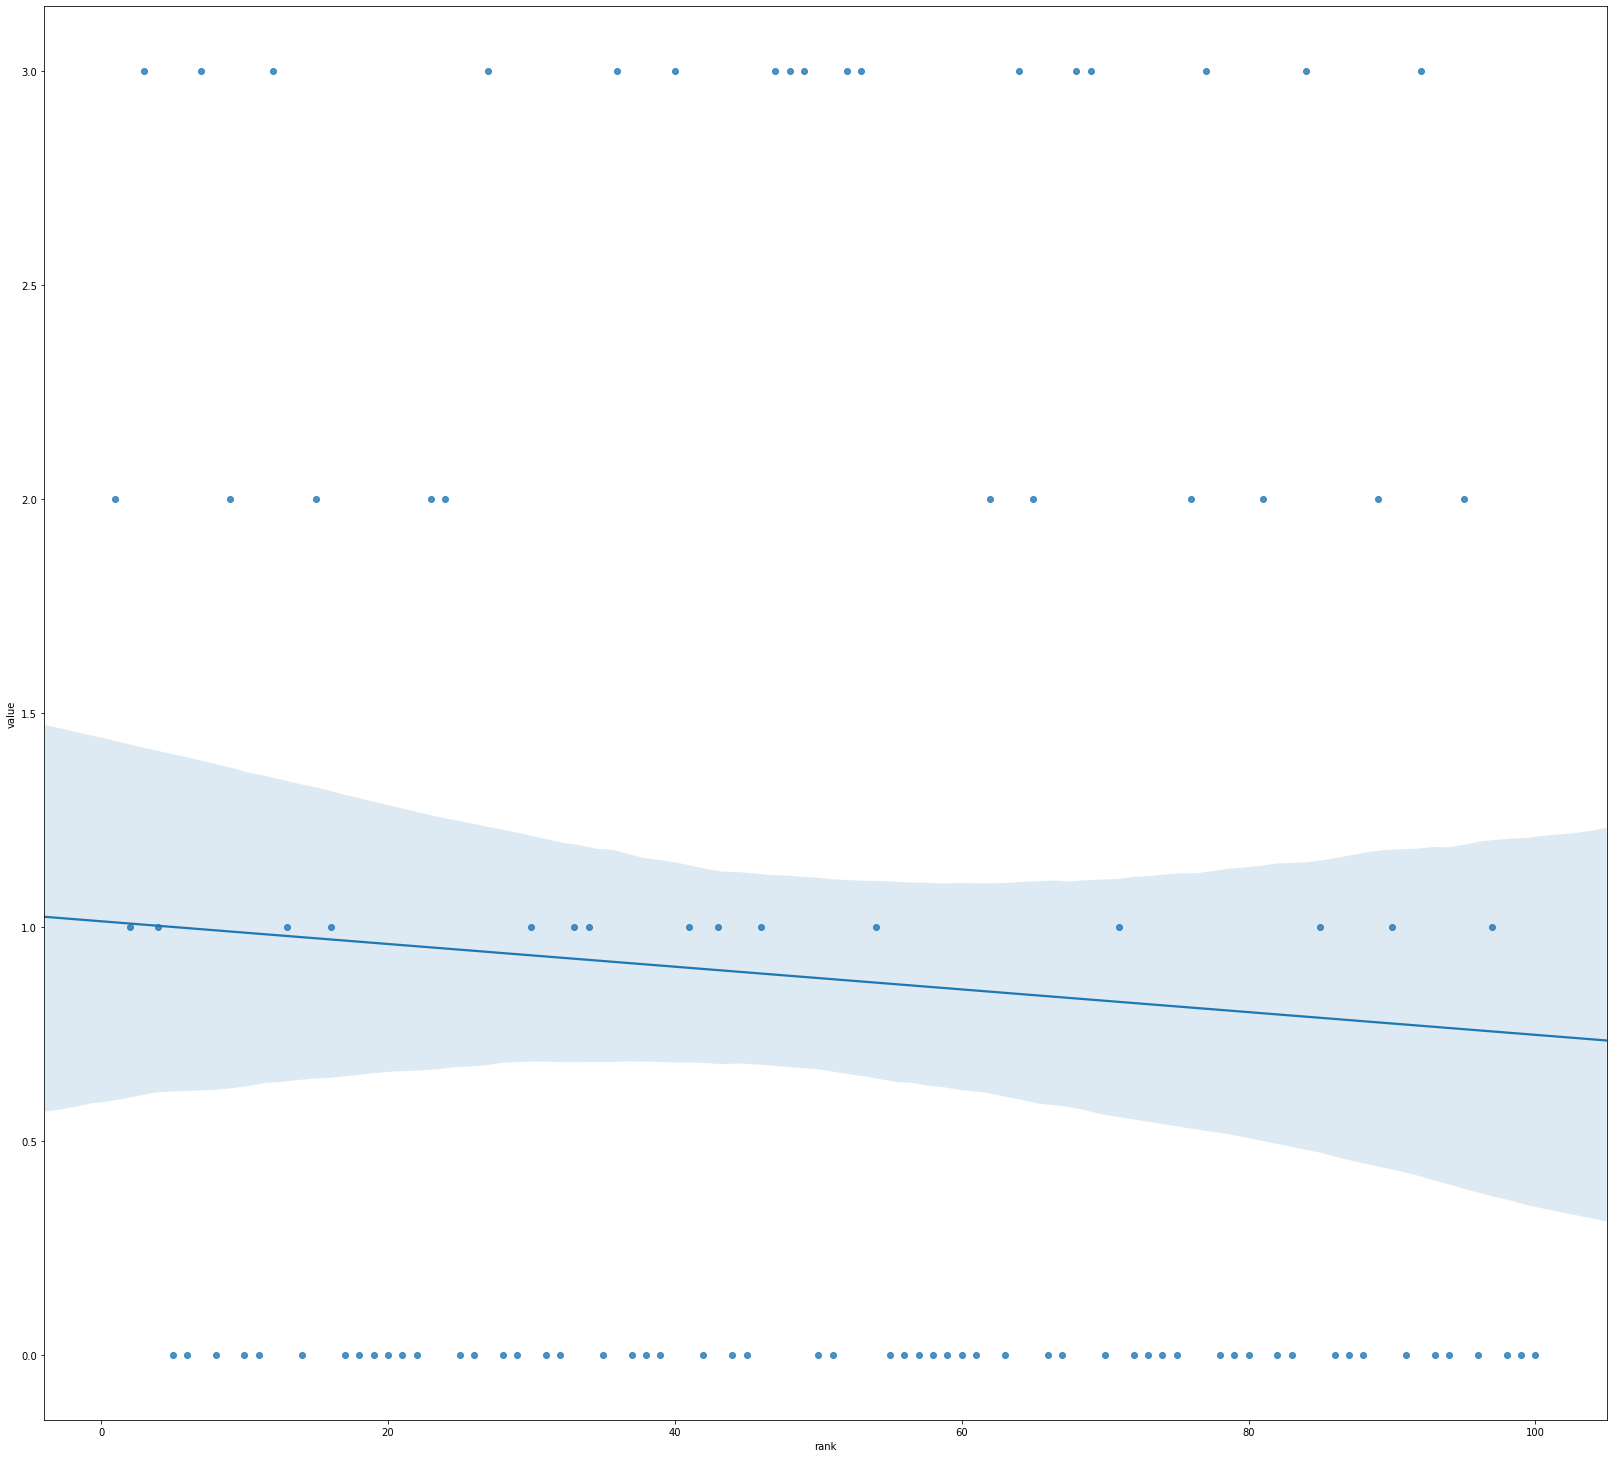

In [72]:
#key

list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

value = []
for j in range(100):
    subvalue = 0
    num = dframe.iloc[j][list_of_factors[2]]
    if num == dframe_factors.iloc[2]['mean']:
        subvalue += 4
    elif dframe_factors.iloc[2]['min_value0.1'] <= num <= dframe_factors.iloc[2]['max_value0.1']:
        subvalue += 3
    elif dframe_factors.iloc[2]['min_value0.2'] <= num <= dframe_factors.iloc[2]['max_value0.2']:
        subvalue += 2
    elif dframe_factors.iloc[2]['min_value0.3'] <= num <= dframe_factors.iloc[2]['max_value0.3']:
        subvalue += 1
    else:
        subvalue += 0
    value.append(subvalue)
    
data = pd.DataFrame({'rank': [i for i in range(1,101)],
                     'value': [i for i in value]})

p = sns.regplot(x='rank',y='value',data=data, fit_reg=True)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
slope_result.append(slope)

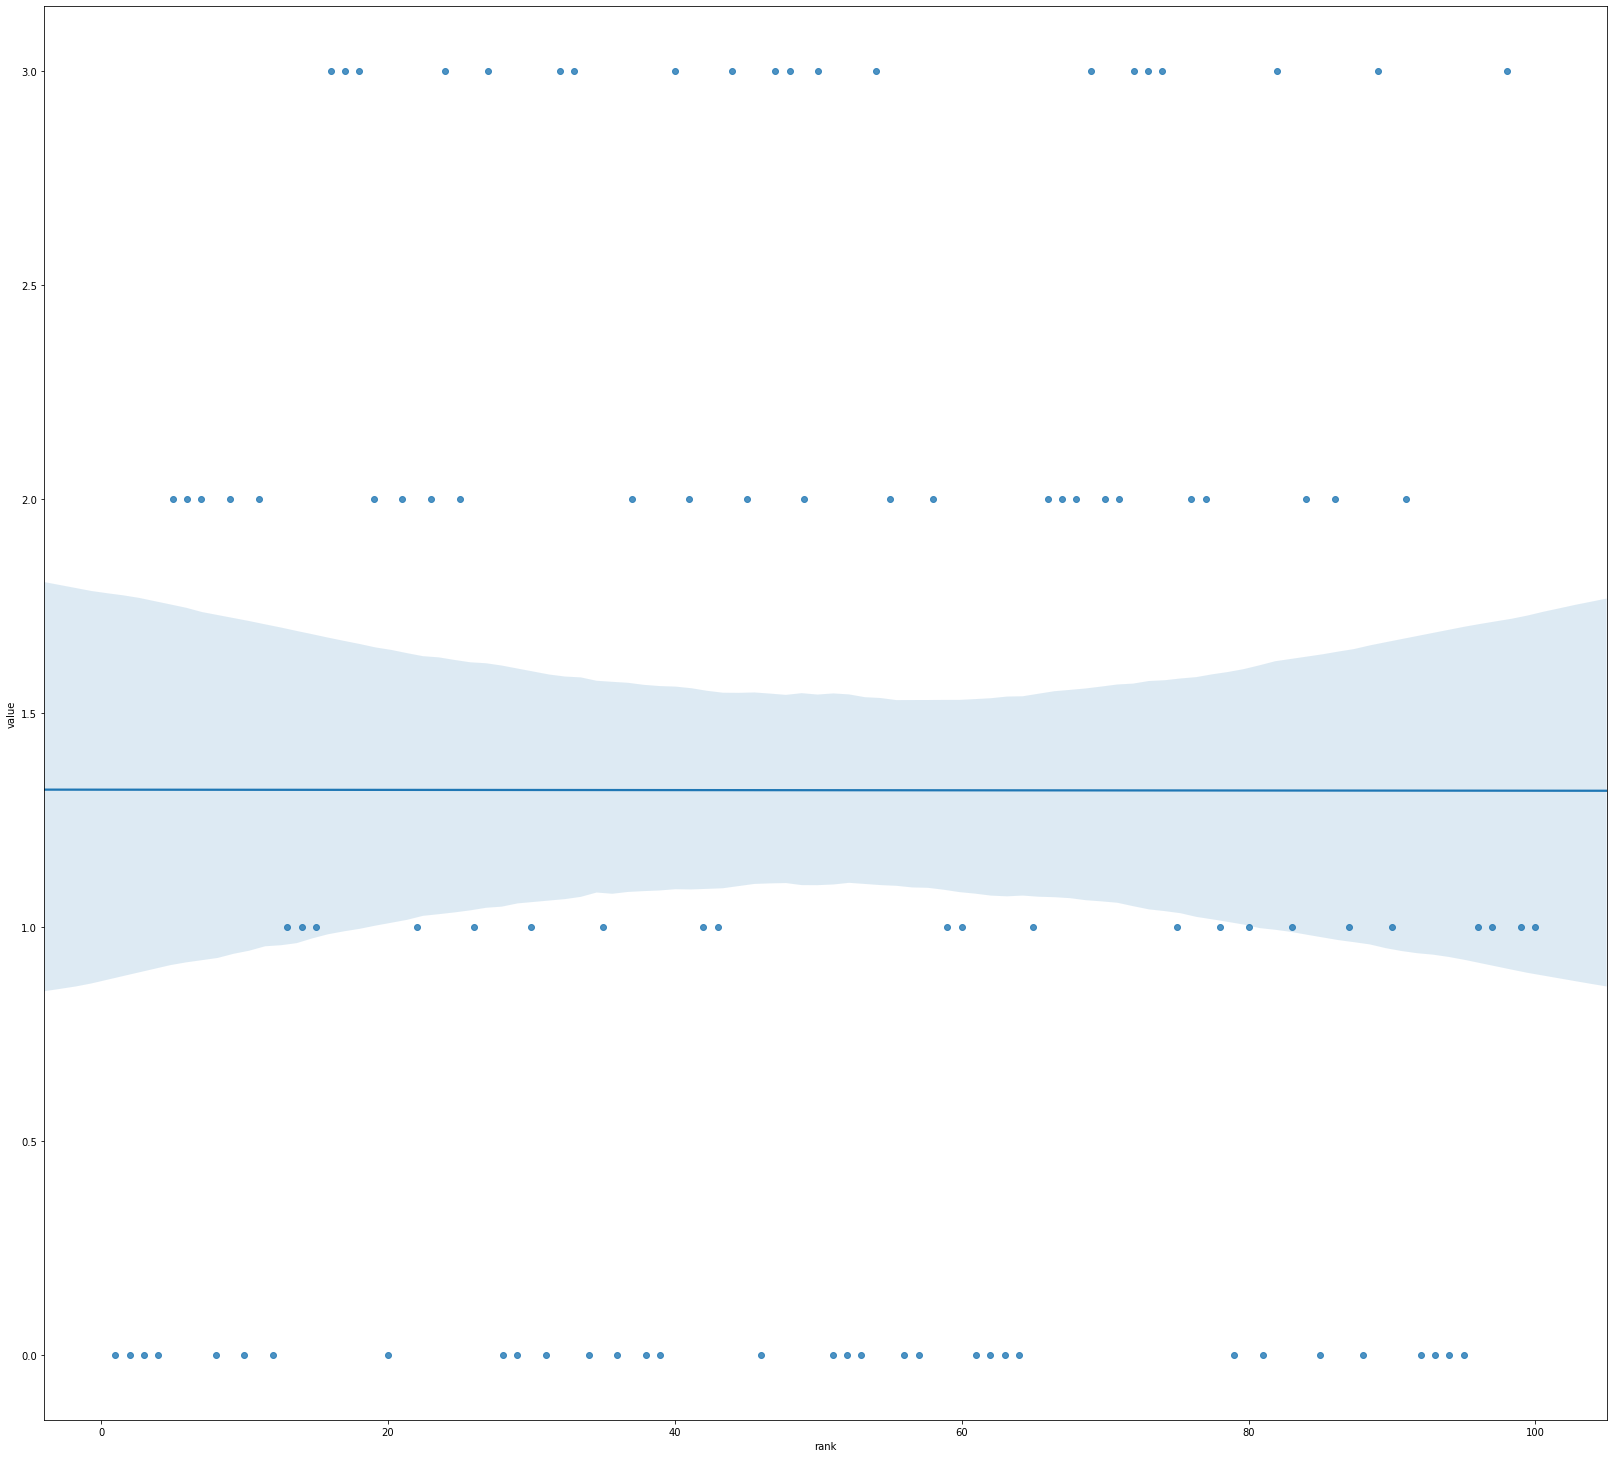

In [73]:
#loudness

list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

value = []
for j in range(100):
    subvalue = 0
    num = dframe.iloc[j][list_of_factors[3]]
    if num == dframe_factors.iloc[3]['mean']:
        subvalue += 4
    elif dframe_factors.iloc[3]['min_value0.1'] <= num <= dframe_factors.iloc[3]['max_value0.1']:
        subvalue += 3
    elif dframe_factors.iloc[3]['min_value0.2'] <= num <= dframe_factors.iloc[3]['max_value0.2']:
        subvalue += 2
    elif dframe_factors.iloc[3]['min_value0.3'] <= num <= dframe_factors.iloc[3]['max_value0.3']:
        subvalue += 1
    else:
        subvalue += 0
    value.append(subvalue)
    
data = pd.DataFrame({'rank': [i for i in range(1,101)],
                     'value': [i for i in value]})

p = sns.regplot(x='rank',y='value',data=data, fit_reg=True)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
slope_result.append(slope)

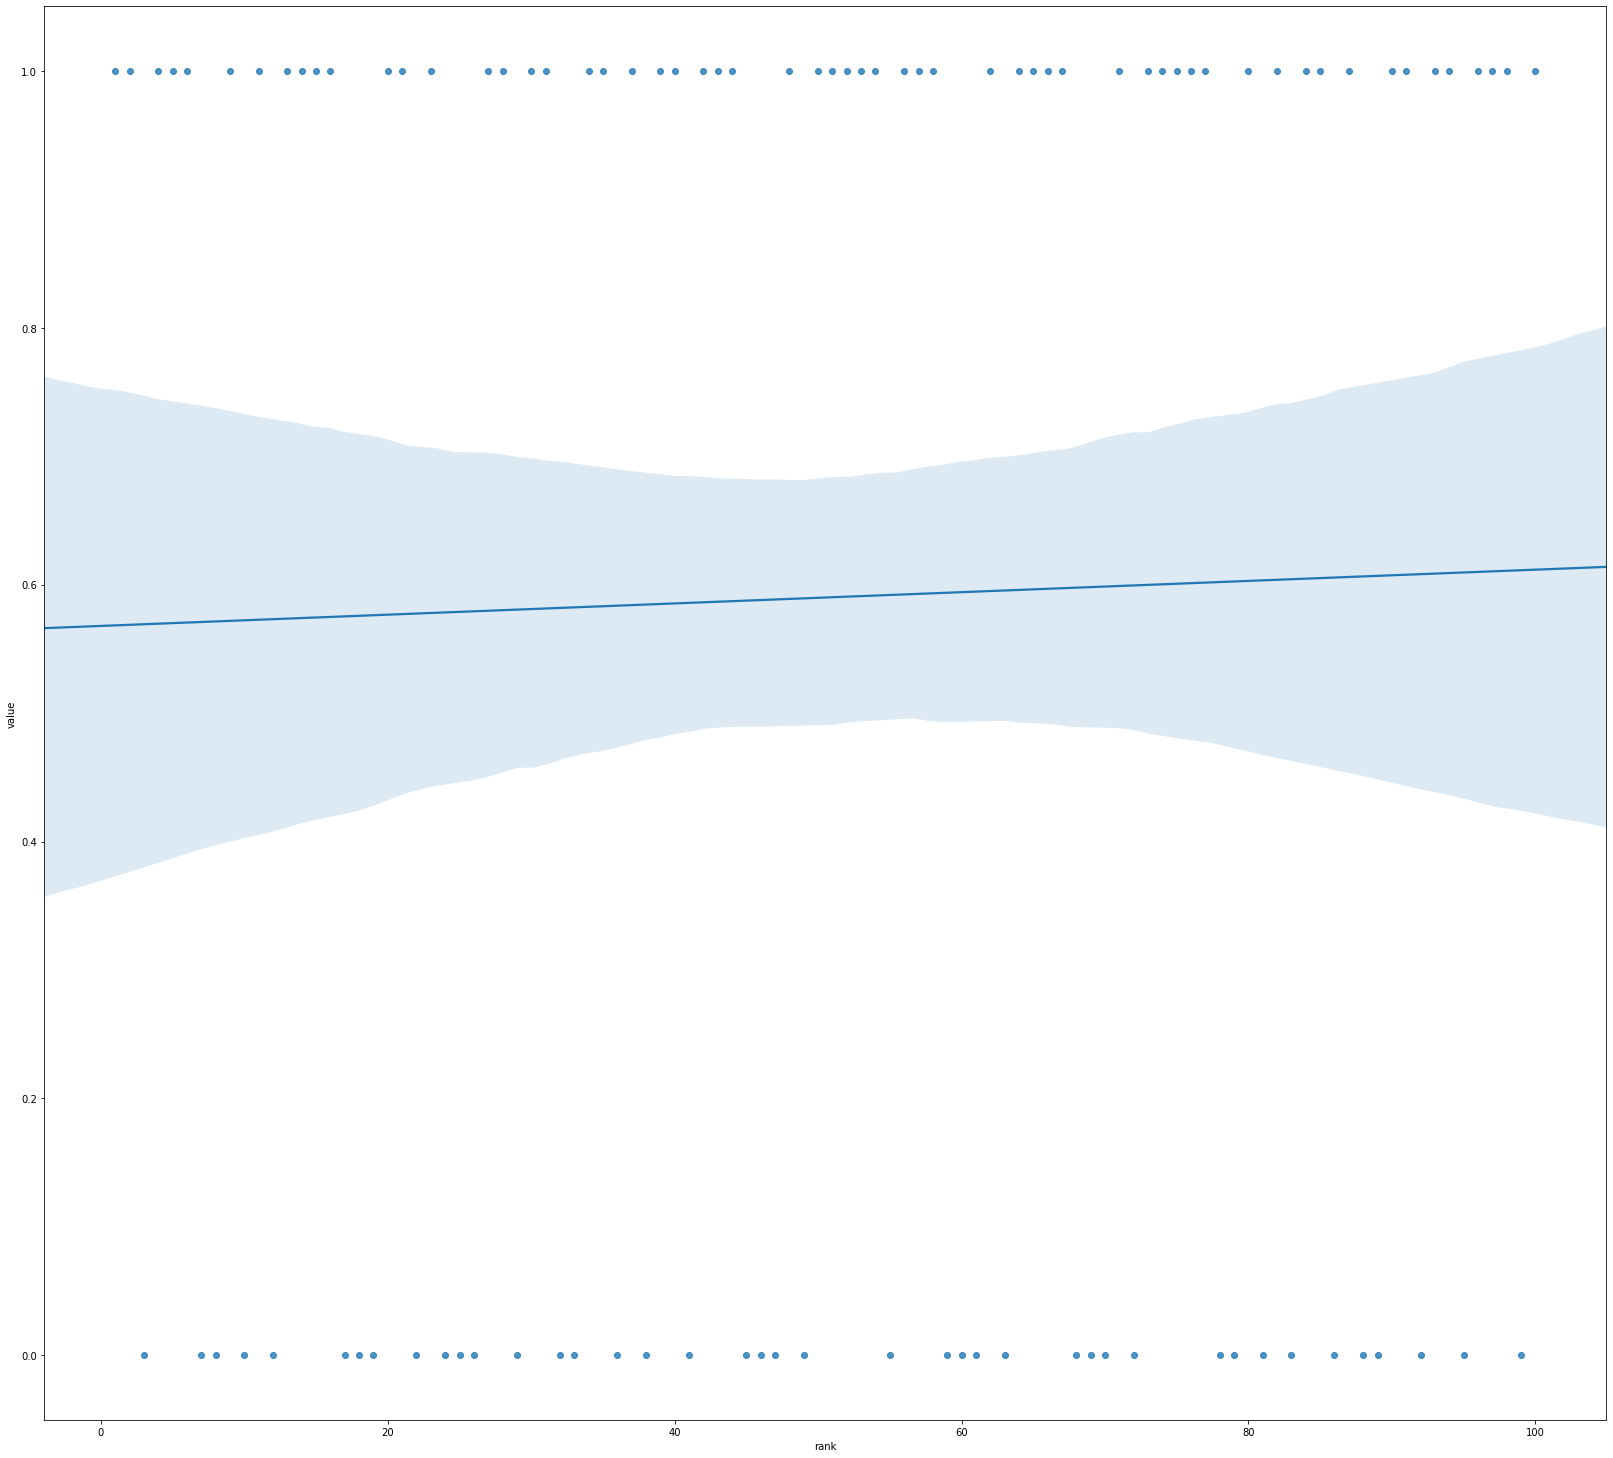

In [74]:
#mode

list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

value = []
for j in range(100):
    subvalue = 0
    num = dframe.iloc[j][list_of_factors[4]]
    if num == dframe_factors.iloc[4]['mean']:
        subvalue += 4
    elif dframe_factors.iloc[4]['min_value0.1'] <= num <= dframe_factors.iloc[4]['max_value0.1']:
        subvalue += 3
    elif dframe_factors.iloc[4]['min_value0.2'] <= num <= dframe_factors.iloc[4]['max_value0.2']:
        subvalue += 2
    elif dframe_factors.iloc[4]['min_value0.3'] <= num <= dframe_factors.iloc[4]['max_value0.3']:
        subvalue += 1
    else:
        subvalue += 0
    value.append(subvalue)
    
data = pd.DataFrame({'rank': [i for i in range(1,101)],
                     'value': [i for i in value]})

p = sns.regplot(x='rank',y='value',data=data, fit_reg=True)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
slope_result.append(slope)

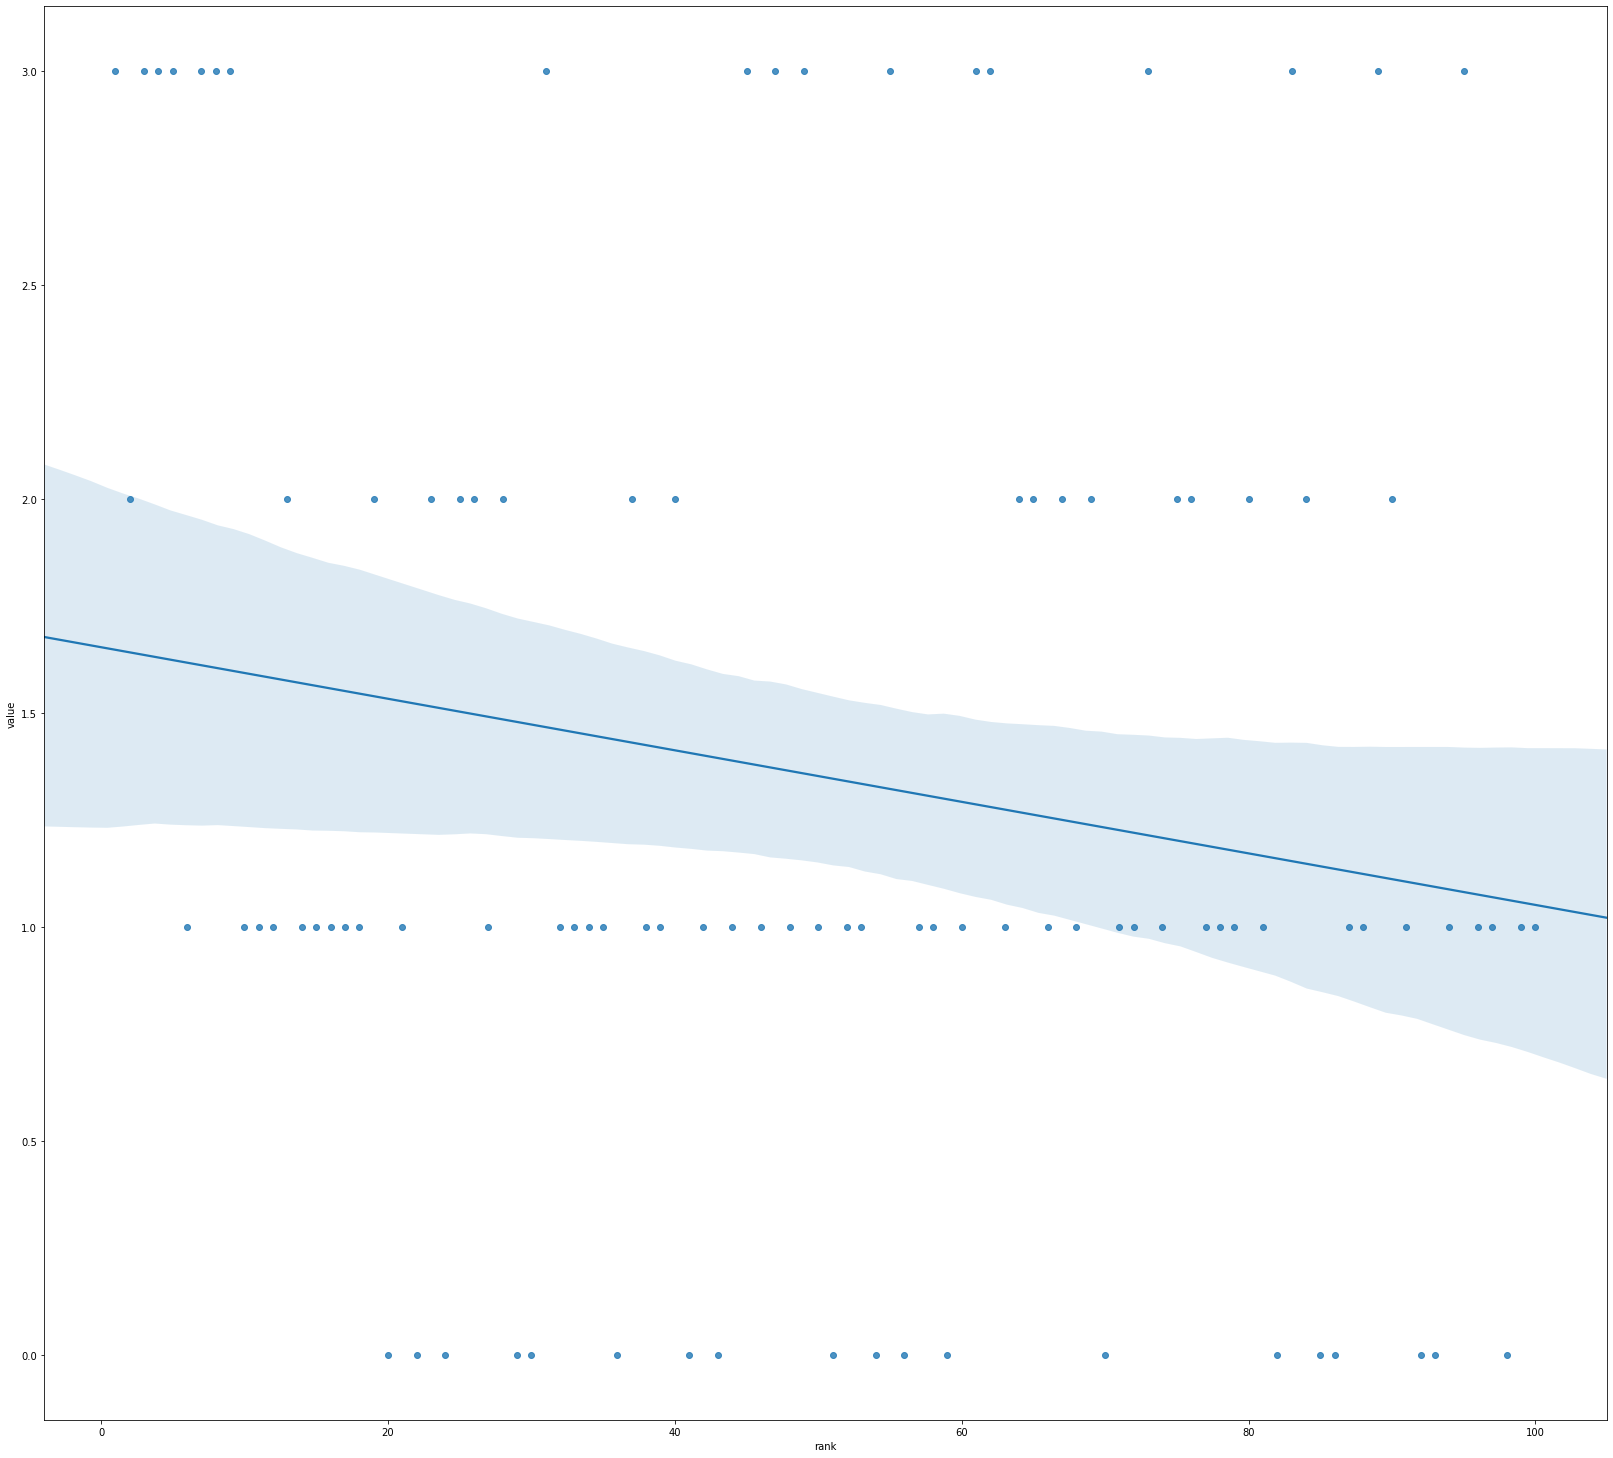

In [75]:
#speechiness

list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

value = []
for j in range(100):
    subvalue = 0
    num = dframe.iloc[j][list_of_factors[5]]
    if num == dframe_factors.iloc[5]['mean']:
        subvalue += 4
    elif dframe_factors.iloc[5]['min_value0.1'] <= num <= dframe_factors.iloc[5]['max_value0.1']:
        subvalue += 3
    elif dframe_factors.iloc[5]['min_value0.2'] <= num <= dframe_factors.iloc[5]['max_value0.2']:
        subvalue += 2
    elif dframe_factors.iloc[5]['min_value0.3'] <= num <= dframe_factors.iloc[5]['max_value0.3']:
        subvalue += 1
    else:
        subvalue += 0
    value.append(subvalue)
    
data = pd.DataFrame({'rank': [i for i in range(1,101)],
                     'value': [i for i in value]})

p = sns.regplot(x='rank',y='value',data=data, fit_reg=True)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
slope_result.append(slope)

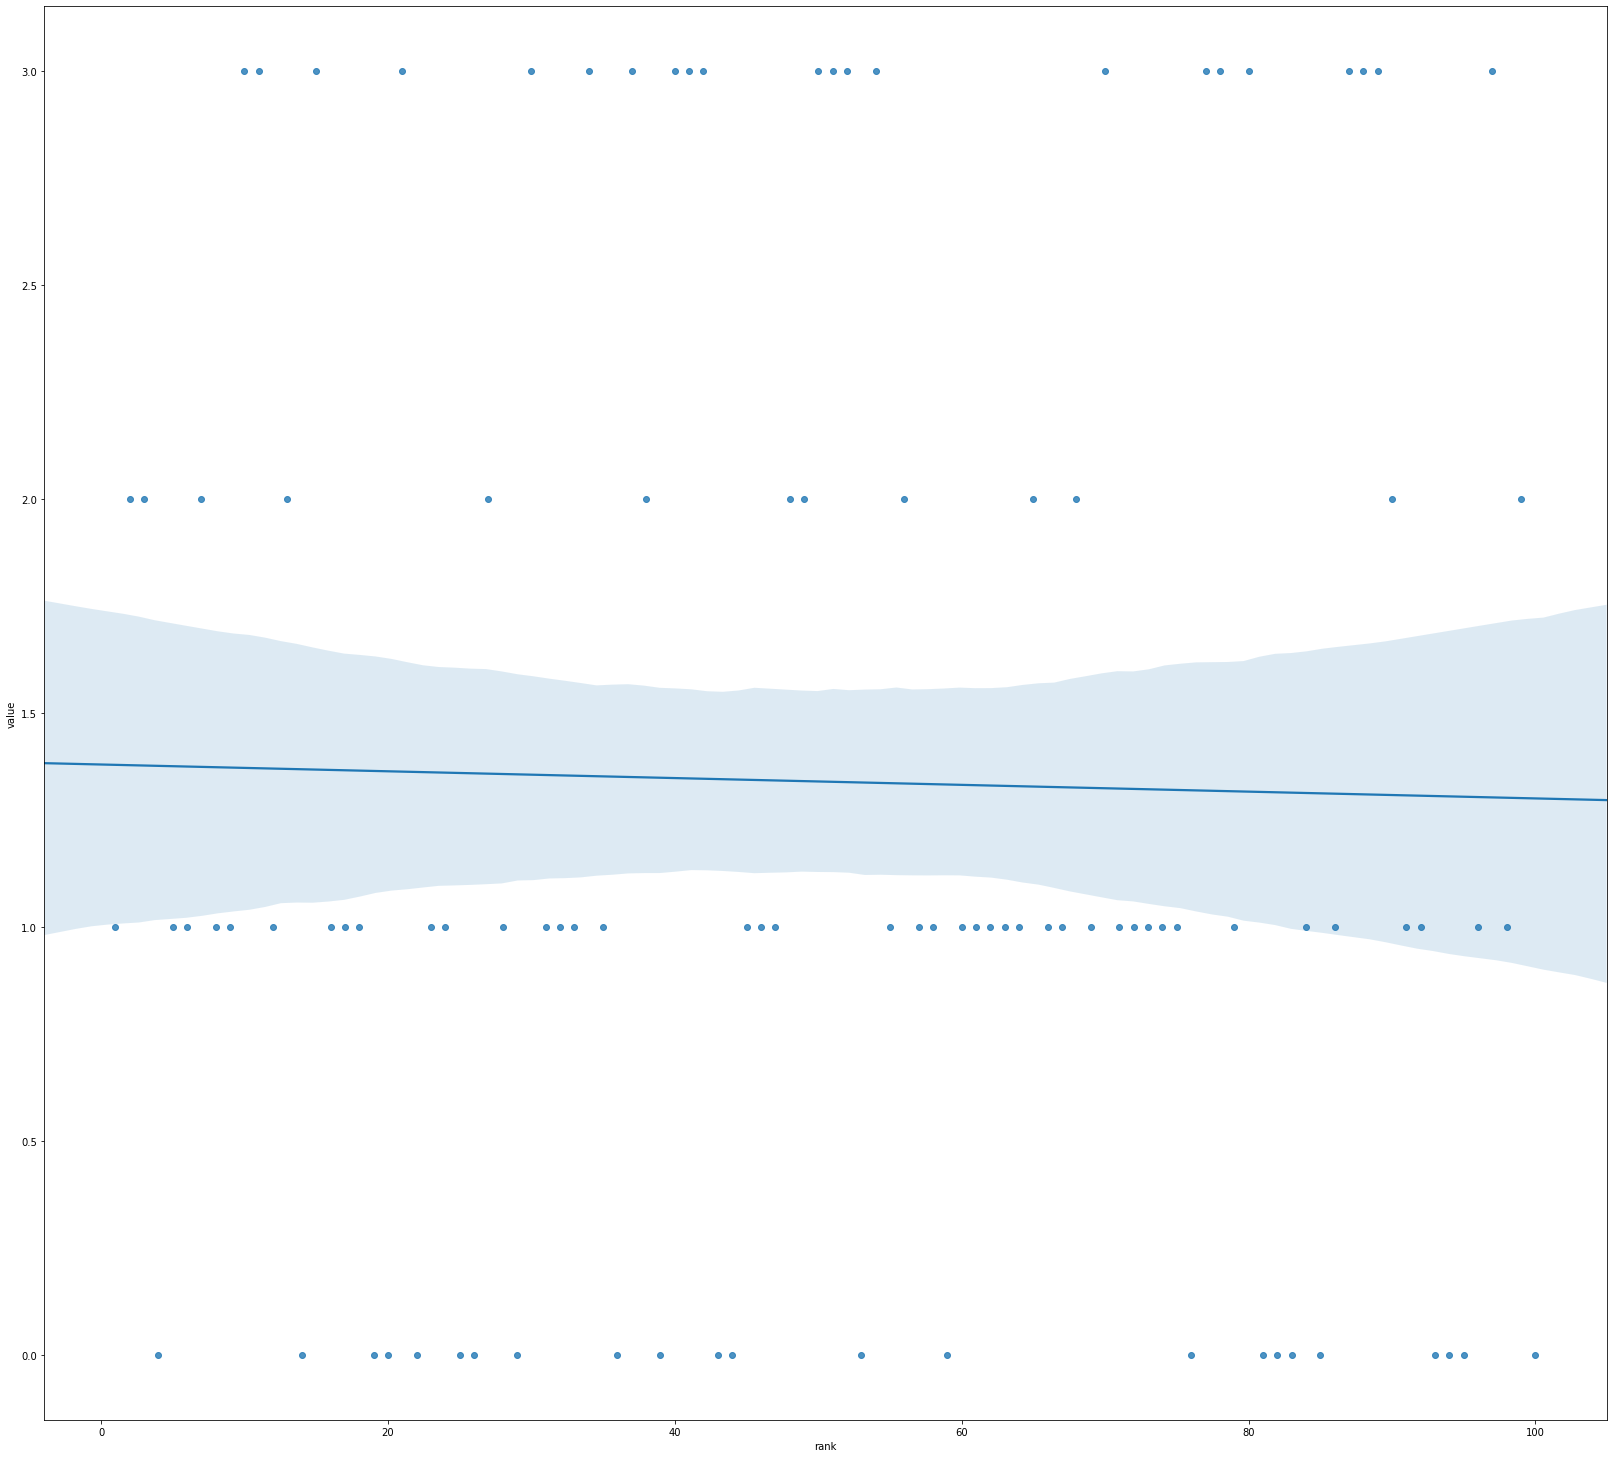

In [76]:
#acousticness

list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

value = []
for j in range(100):
    subvalue = 0
    num = dframe.iloc[j][list_of_factors[6]]
    if num == dframe_factors.iloc[6]['mean']:
        subvalue += 4
    elif dframe_factors.iloc[6]['min_value0.1'] <= num <= dframe_factors.iloc[6]['max_value0.1']:
        subvalue += 3
    elif dframe_factors.iloc[6]['min_value0.2'] <= num <= dframe_factors.iloc[6]['max_value0.2']:
        subvalue += 2
    elif dframe_factors.iloc[6]['min_value0.3'] <= num <= dframe_factors.iloc[6]['max_value0.3']:
        subvalue += 1
    else:
        subvalue += 0
    value.append(subvalue)
    
data = pd.DataFrame({'rank': [i for i in range(1,101)],
                     'value': [i for i in value]})

p = sns.regplot(x='rank',y='value',data=data, fit_reg=True)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
slope_result.append(slope)

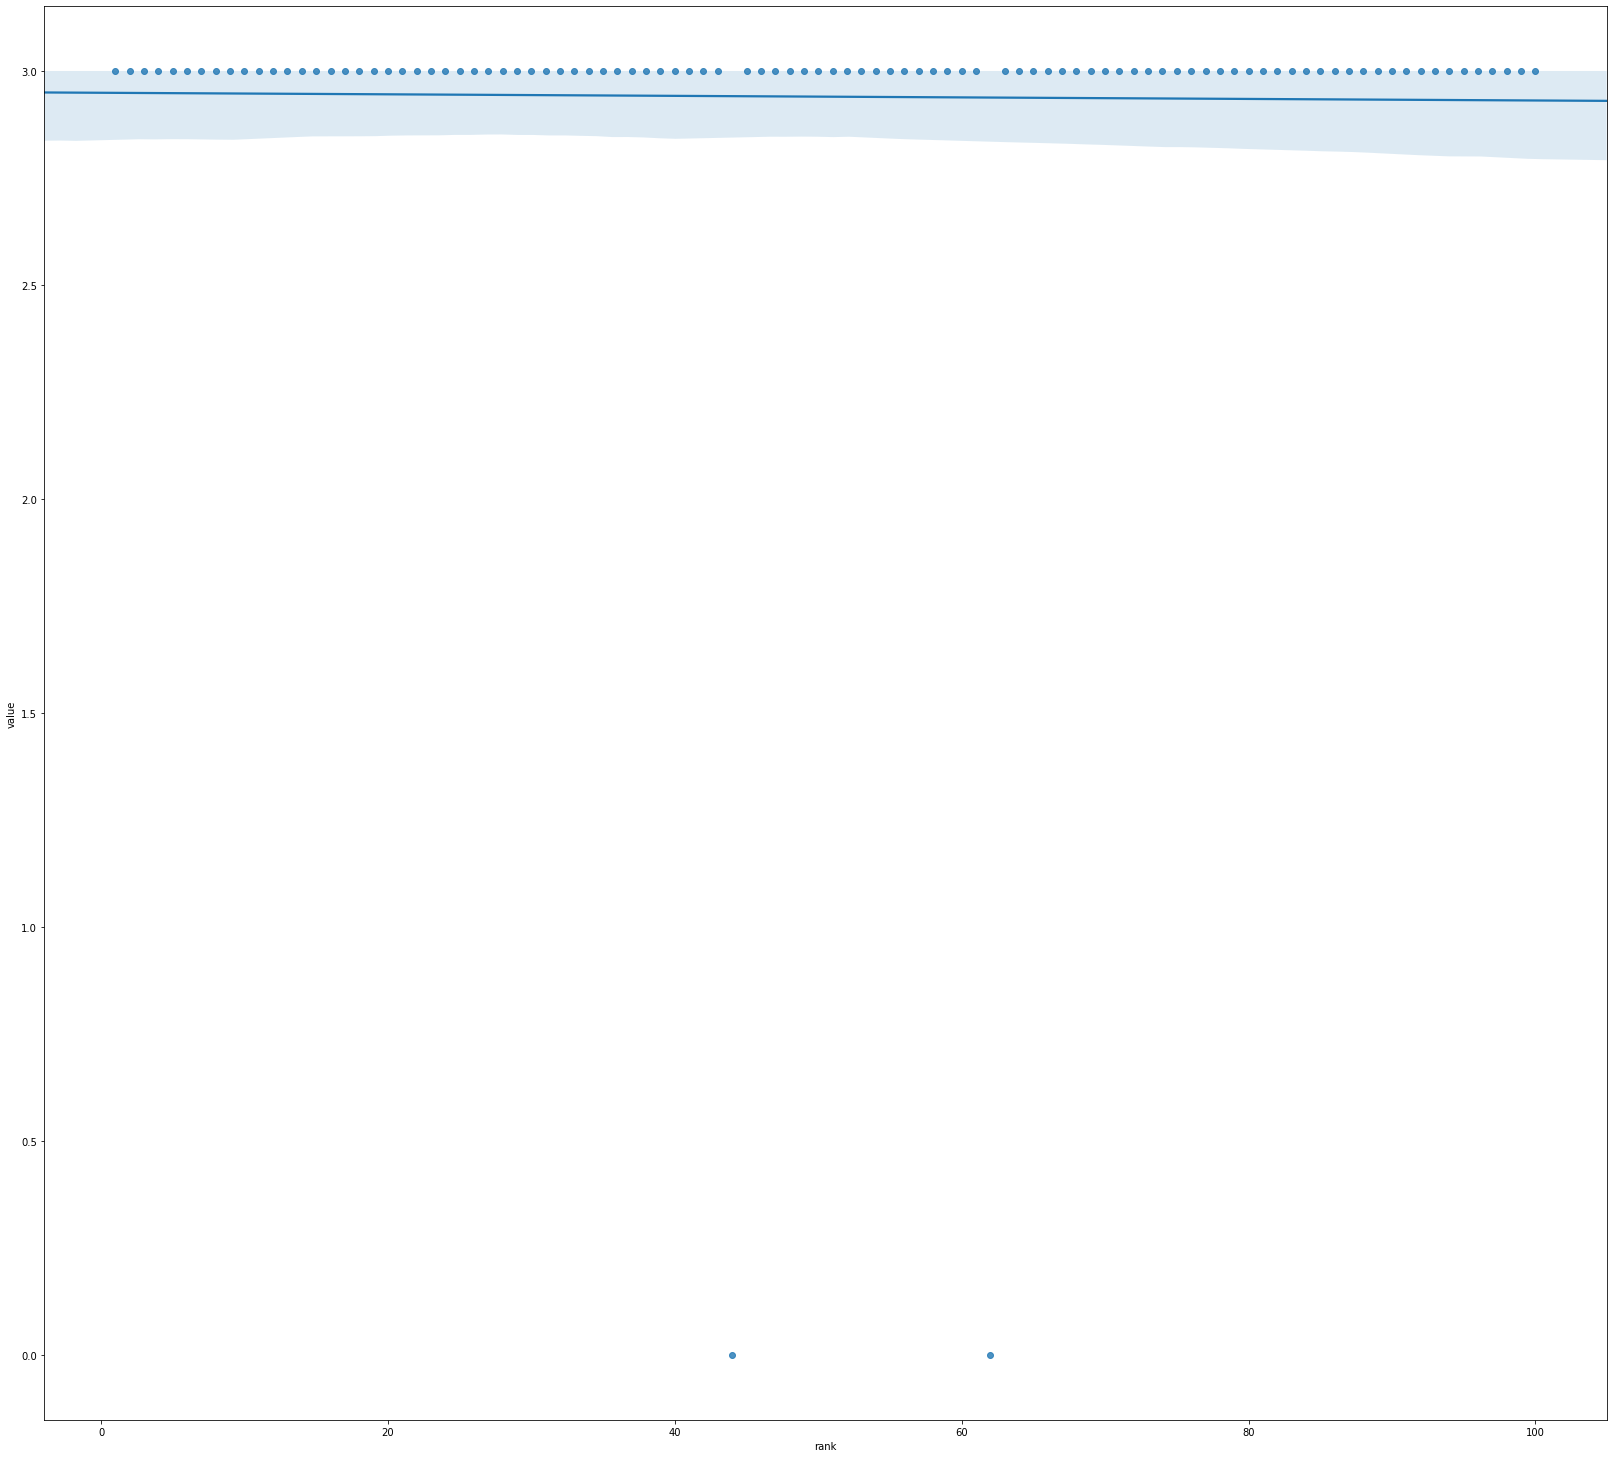

In [77]:
#instrumentalness

list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

value = []
for j in range(100):
    subvalue = 0
    num = dframe.iloc[j][list_of_factors[7]]
    if num == dframe_factors.iloc[7]['mean']:
        subvalue += 4
    elif dframe_factors.iloc[7]['min_value0.1'] <= num <= dframe_factors.iloc[7]['max_value0.1']:
        subvalue += 3
    elif dframe_factors.iloc[7]['min_value0.2'] <= num <= dframe_factors.iloc[7]['max_value0.2']:
        subvalue += 2
    elif dframe_factors.iloc[7]['min_value0.3'] <= num <= dframe_factors.iloc[7]['max_value0.3']:
        subvalue += 1
    else:
        subvalue += 0
    value.append(subvalue)
    
data = pd.DataFrame({'rank': [i for i in range(1,101)],
                     'value': [i for i in value]})

p = sns.regplot(x='rank',y='value',data=data, fit_reg=True)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
slope_result.append(slope)

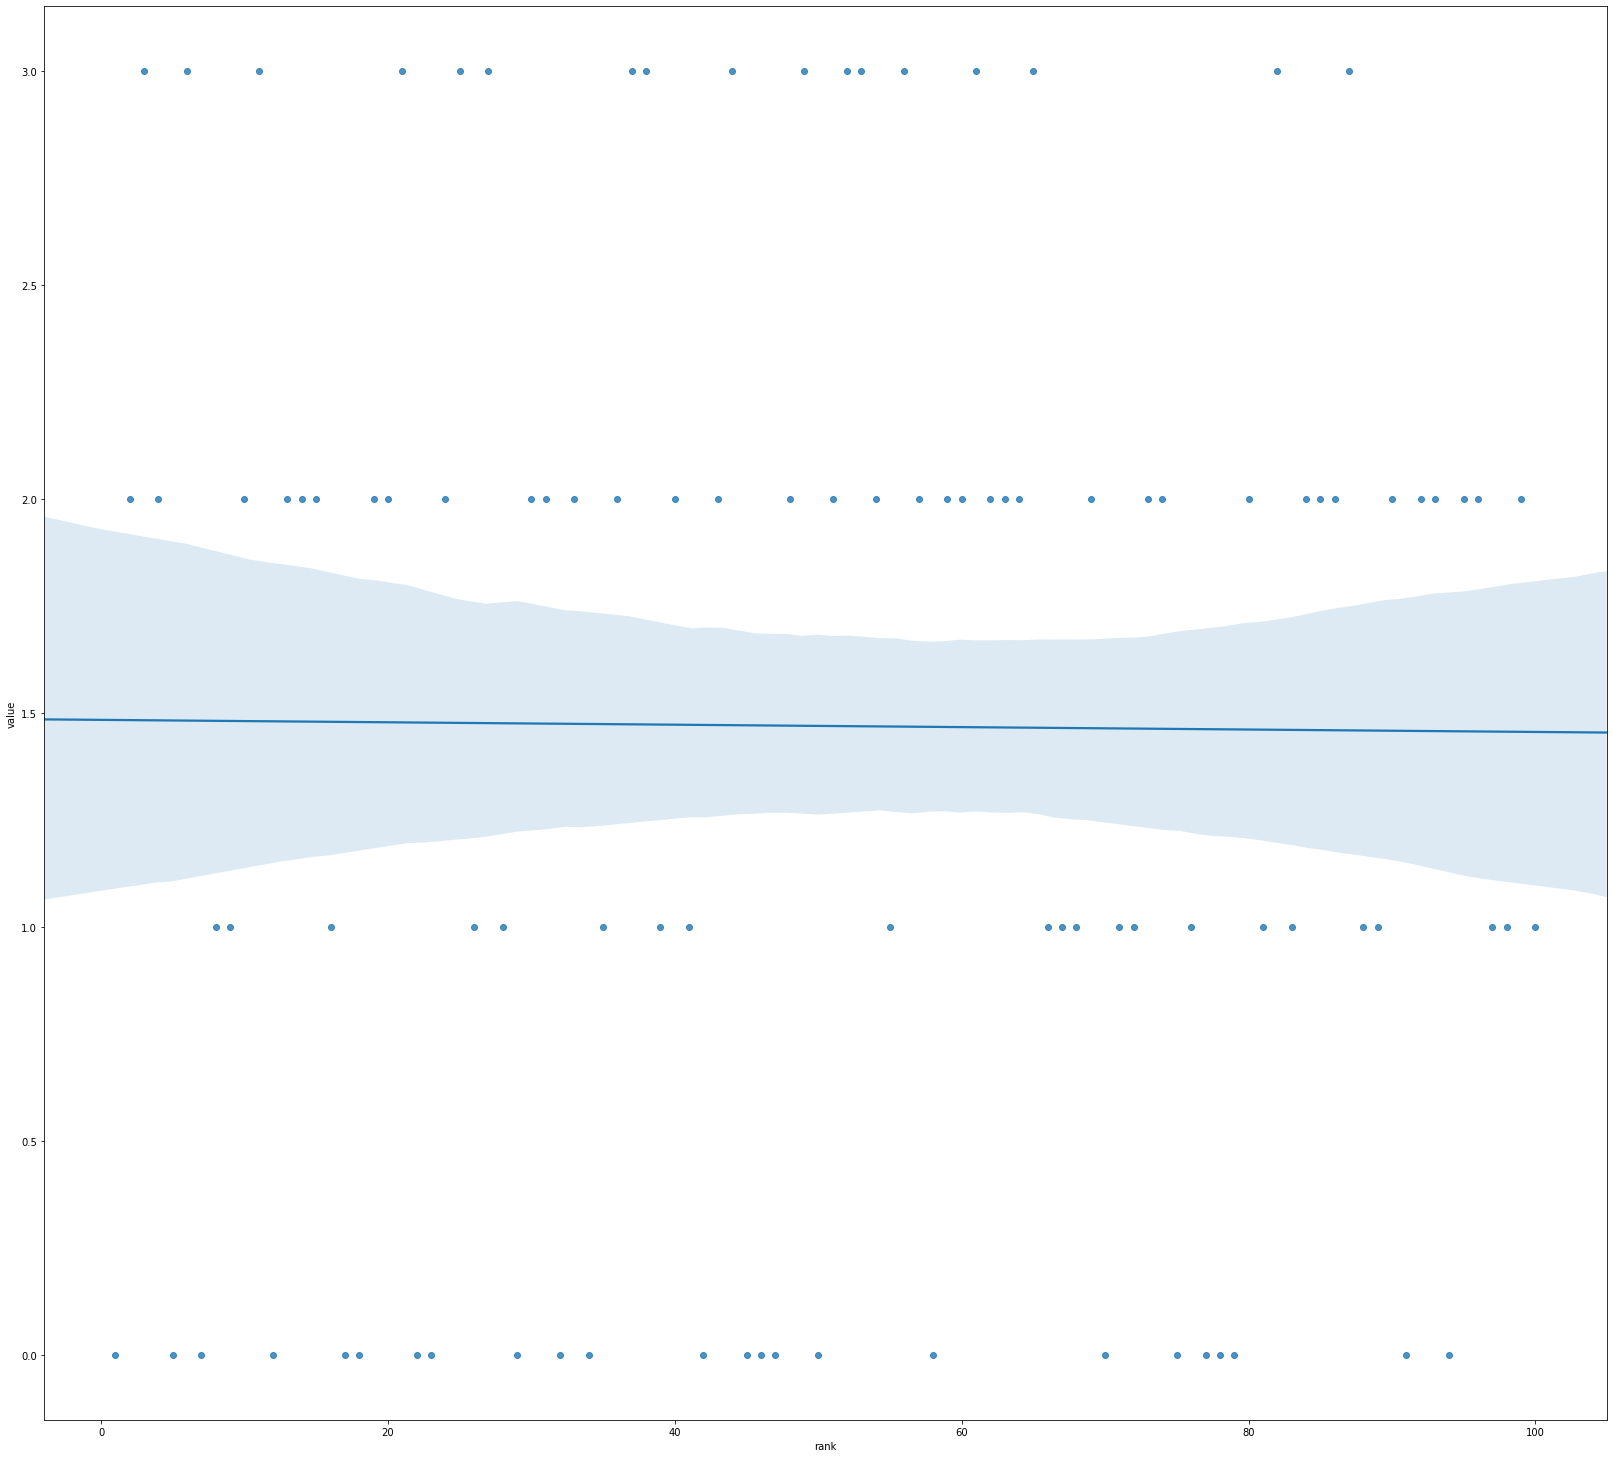

In [78]:
#liveness

list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

value = []
for j in range(100):
    subvalue = 0
    num = dframe.iloc[j][list_of_factors[8]]
    if num == dframe_factors.iloc[8]['mean']:
        subvalue += 4
    elif dframe_factors.iloc[8]['min_value0.1'] <= num <= dframe_factors.iloc[8]['max_value0.1']:
        subvalue += 3
    elif dframe_factors.iloc[8]['min_value0.2'] <= num <= dframe_factors.iloc[8]['max_value0.2']:
        subvalue += 2
    elif dframe_factors.iloc[8]['min_value0.3'] <= num <= dframe_factors.iloc[8]['max_value0.3']:
        subvalue += 1
    else:
        subvalue += 0
    value.append(subvalue)
    
data = pd.DataFrame({'rank': [i for i in range(1,101)],
                     'value': [i for i in value]})

p = sns.regplot(x='rank',y='value',data=data, fit_reg=True)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
slope_result.append(slope)

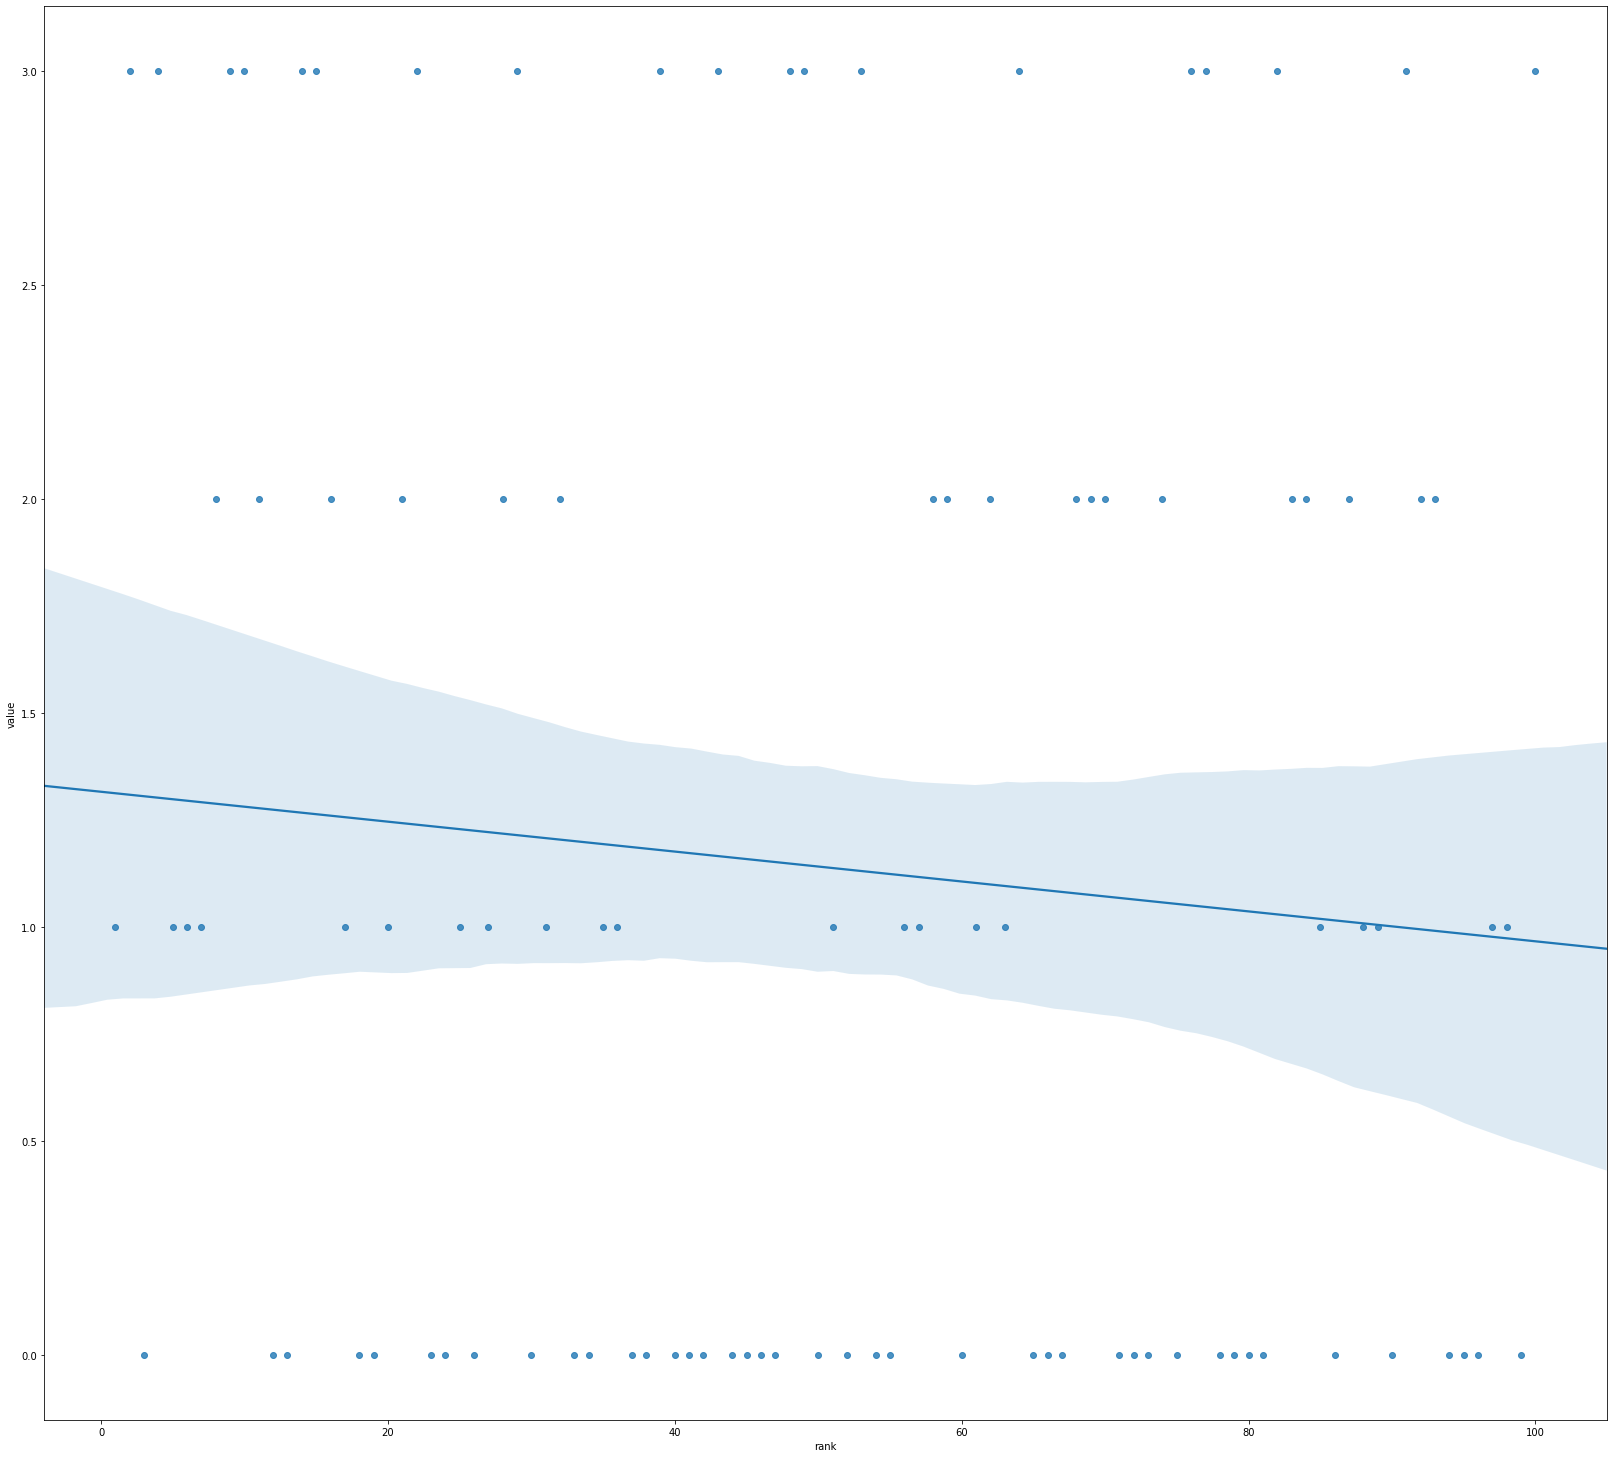

In [79]:
#valence

list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

value = []
for j in range(100):
    subvalue = 0
    num = dframe.iloc[j][list_of_factors[9]]
    if num == dframe_factors.iloc[9]['mean']:
        subvalue += 4
    elif dframe_factors.iloc[9]['min_value0.1'] <= num <= dframe_factors.iloc[9]['max_value0.1']:
        subvalue += 3
    elif dframe_factors.iloc[9]['min_value0.2'] <= num <= dframe_factors.iloc[9]['max_value0.2']:
        subvalue += 2
    elif dframe_factors.iloc[9]['min_value0.3'] <= num <= dframe_factors.iloc[9]['max_value0.3']:
        subvalue += 1
    else:
        subvalue += 0
    value.append(subvalue)
    
data = pd.DataFrame({'rank': [i for i in range(1,101)],
                     'value': [i for i in value]})

p = sns.regplot(x='rank',y='value',data=data, fit_reg=True)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
slope_result.append(slope)

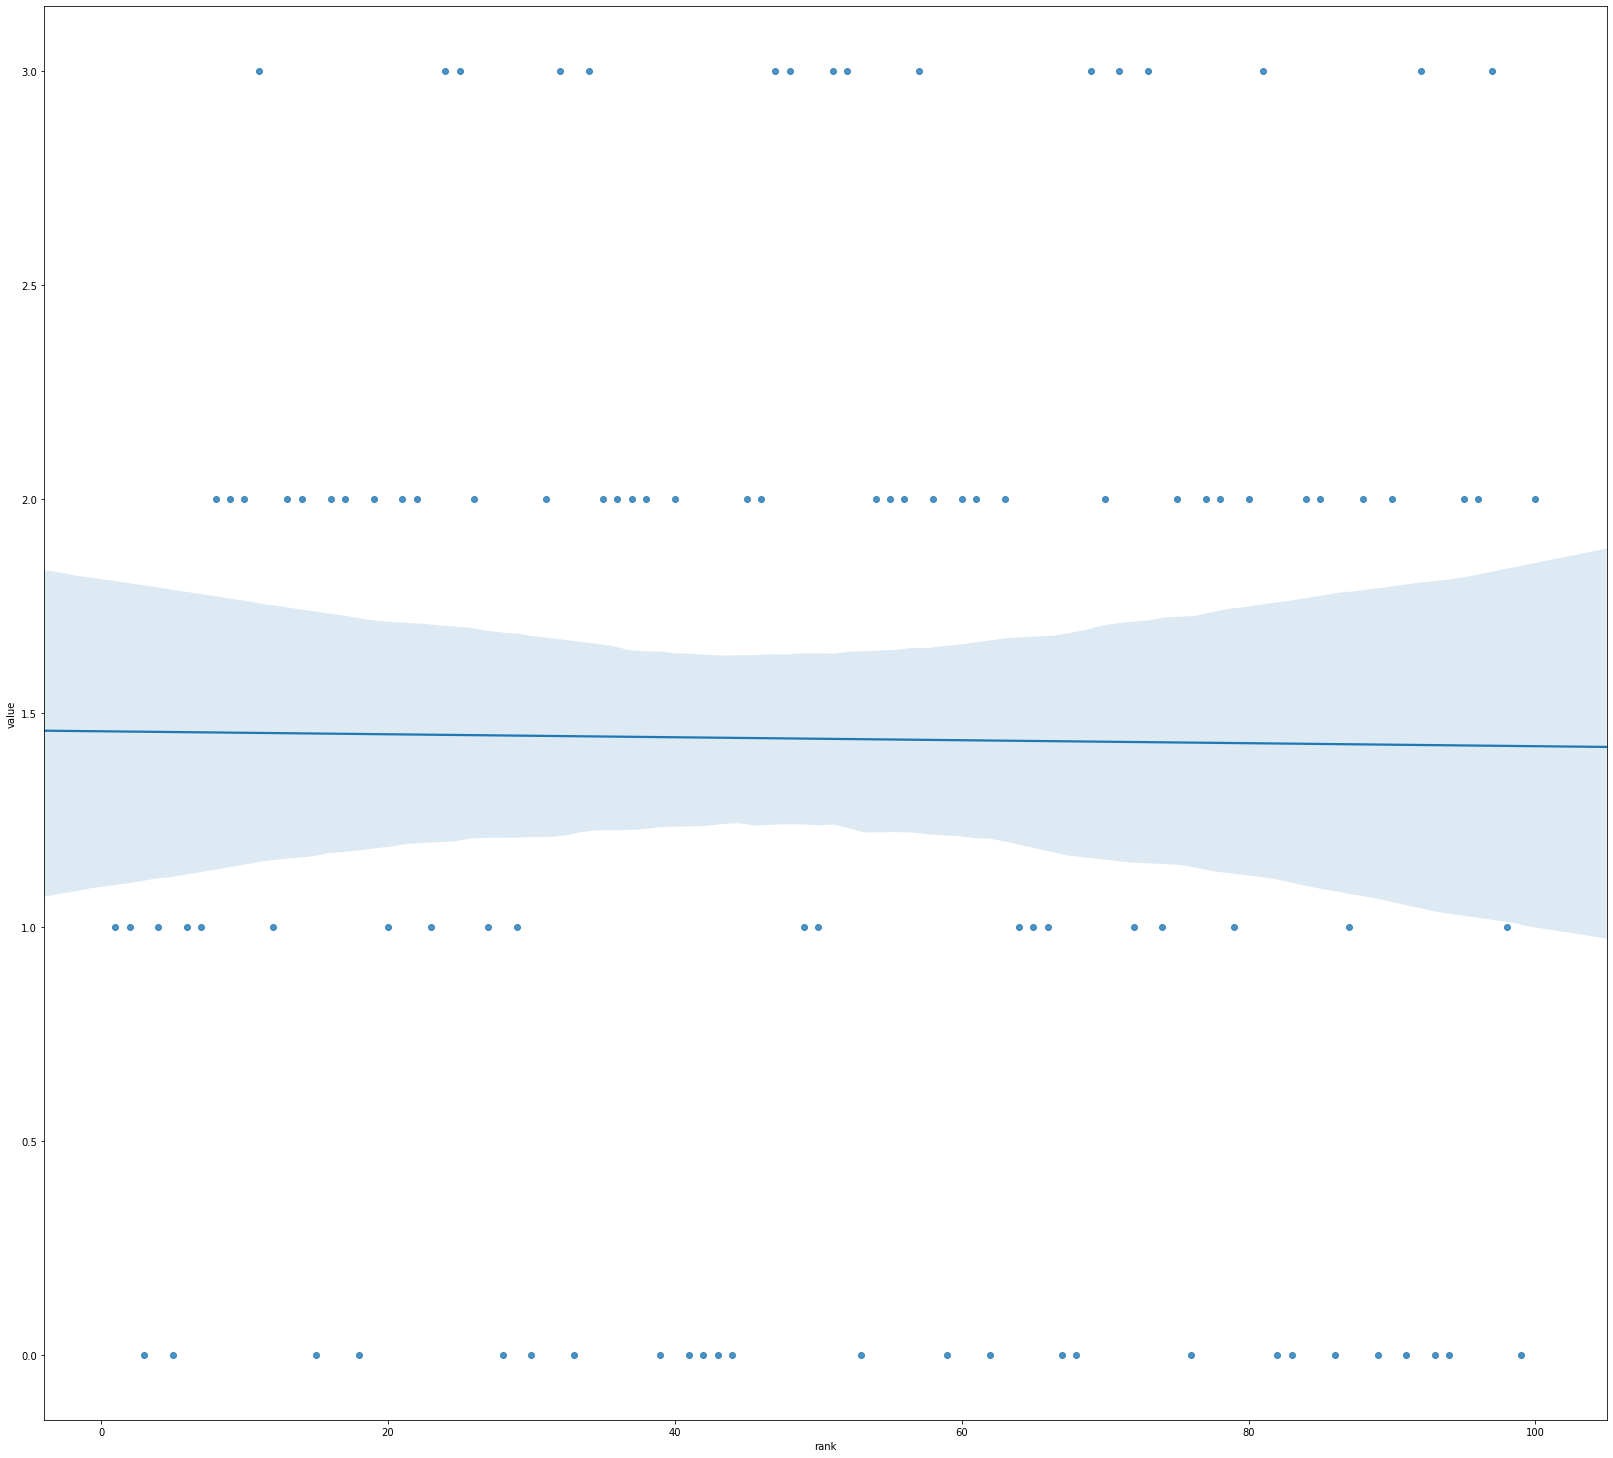

In [80]:
#tempo

list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

value = []
for j in range(100):
    subvalue = 0
    num = dframe.iloc[j][list_of_factors[10]]
    if num == dframe_factors.iloc[10]['mean']:
        subvalue += 4
    elif dframe_factors.iloc[10]['min_value0.1'] <= num <= dframe_factors.iloc[10]['max_value0.1']:
        subvalue += 3
    elif dframe_factors.iloc[10]['min_value0.2'] <= num <= dframe_factors.iloc[10]['max_value0.2']:
        subvalue += 2
    elif dframe_factors.iloc[10]['min_value0.3'] <= num <= dframe_factors.iloc[10]['max_value0.3']:
        subvalue += 1
    else:
        subvalue += 0
    value.append(subvalue)
    
data = pd.DataFrame({'rank': [i for i in range(1,101)],
                     'value': [i for i in value]})

p = sns.regplot(x='rank',y='value',data=data, fit_reg=True)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
slope_result.append(slope)

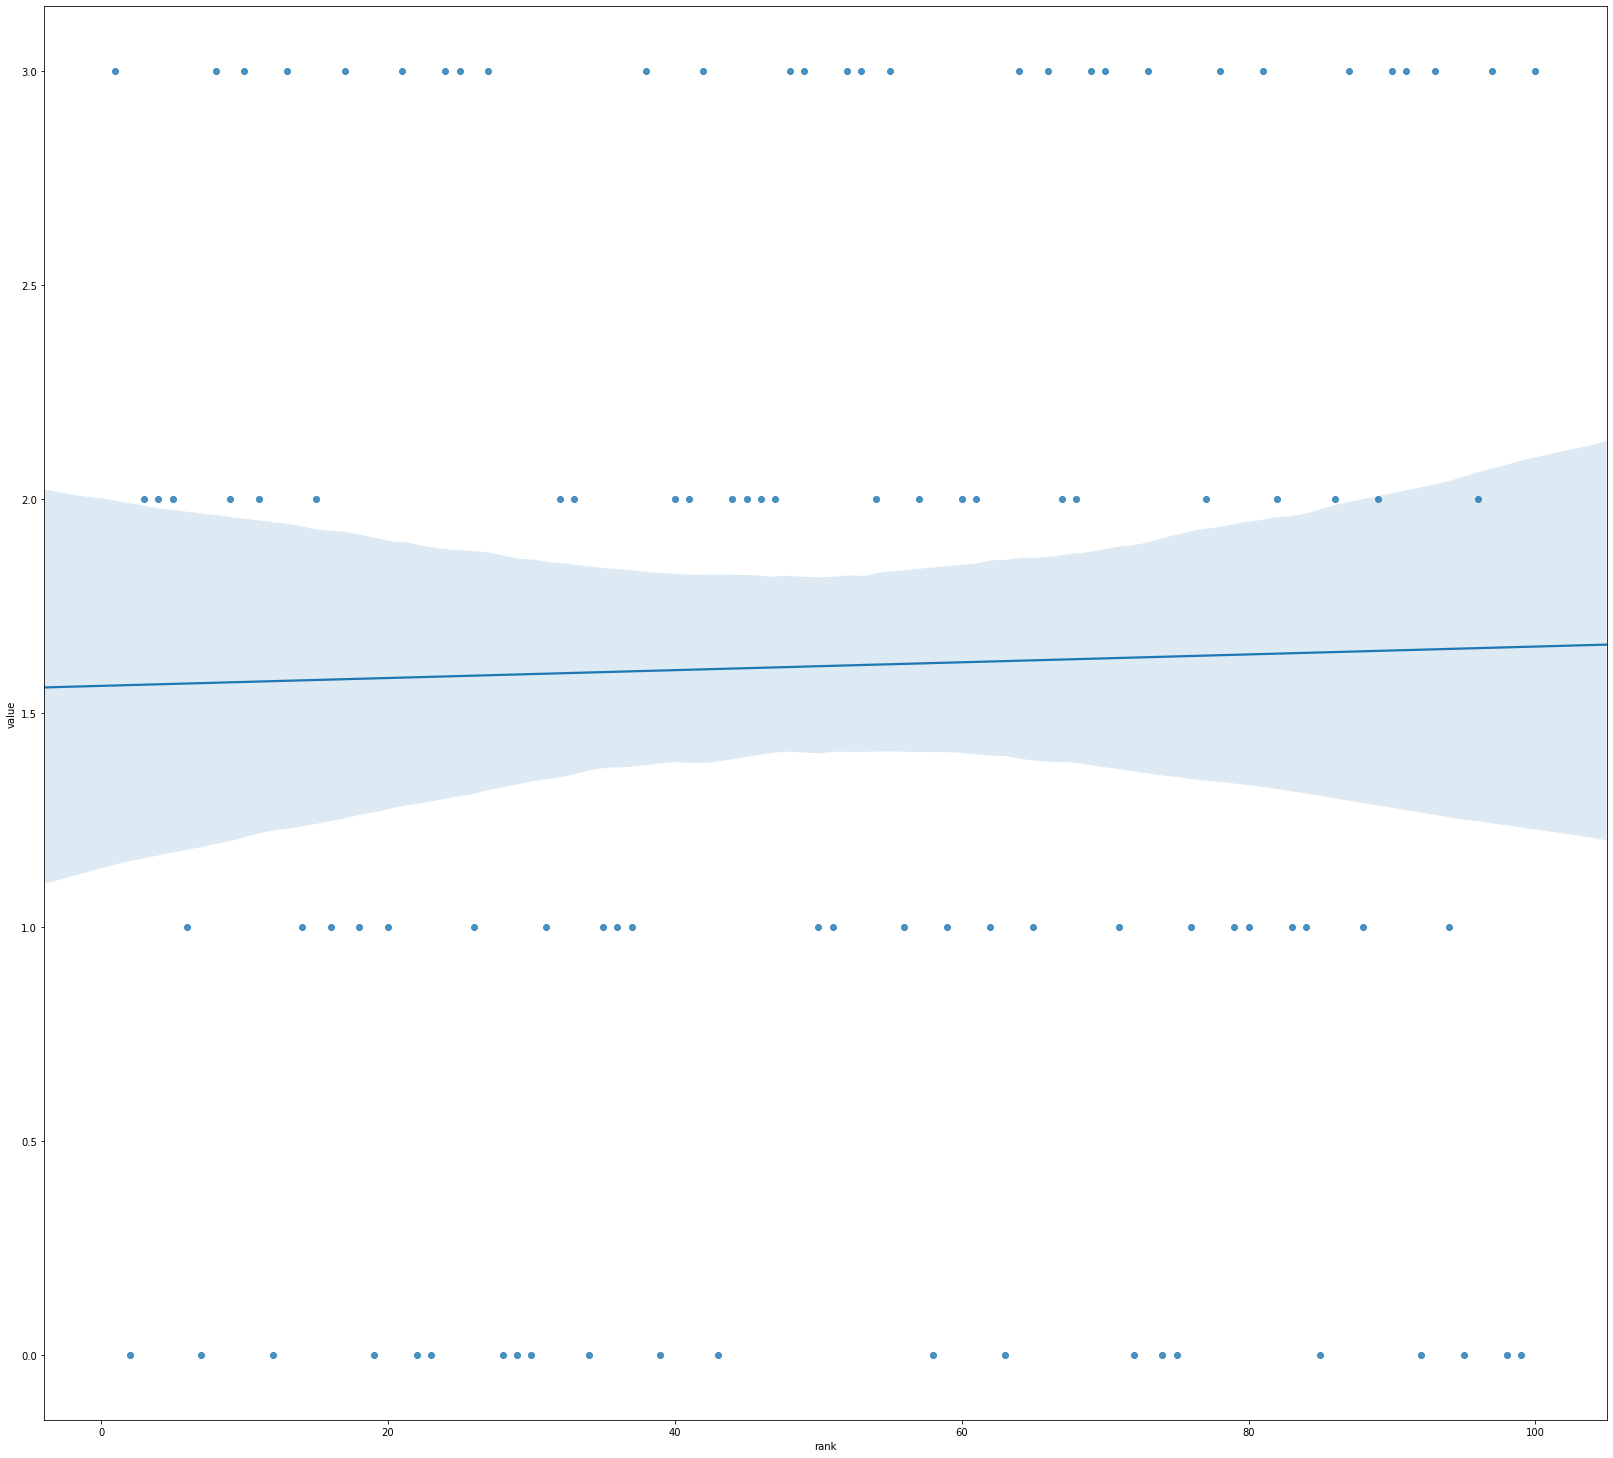

In [81]:
#duration_ms

list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

value = []
for j in range(100):
    subvalue = 0
    num = dframe.iloc[j][list_of_factors[11]]
    if num == dframe_factors.iloc[11]['mean']:
        subvalue += 4
    elif dframe_factors.iloc[11]['min_value0.1'] <= num <= dframe_factors.iloc[11]['max_value0.1']:
        subvalue += 3
    elif dframe_factors.iloc[11]['min_value0.2'] <= num <= dframe_factors.iloc[11]['max_value0.2']:
        subvalue += 2
    elif dframe_factors.iloc[11]['min_value0.3'] <= num <= dframe_factors.iloc[11]['max_value0.3']:
        subvalue += 1
    else:
        subvalue += 0
    value.append(subvalue)
    
data = pd.DataFrame({'rank': [i for i in range(1,101)],
                     'value': [i for i in value]})

p = sns.regplot(x='rank',y='value',data=data, fit_reg=True)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
slope_result.append(slope)

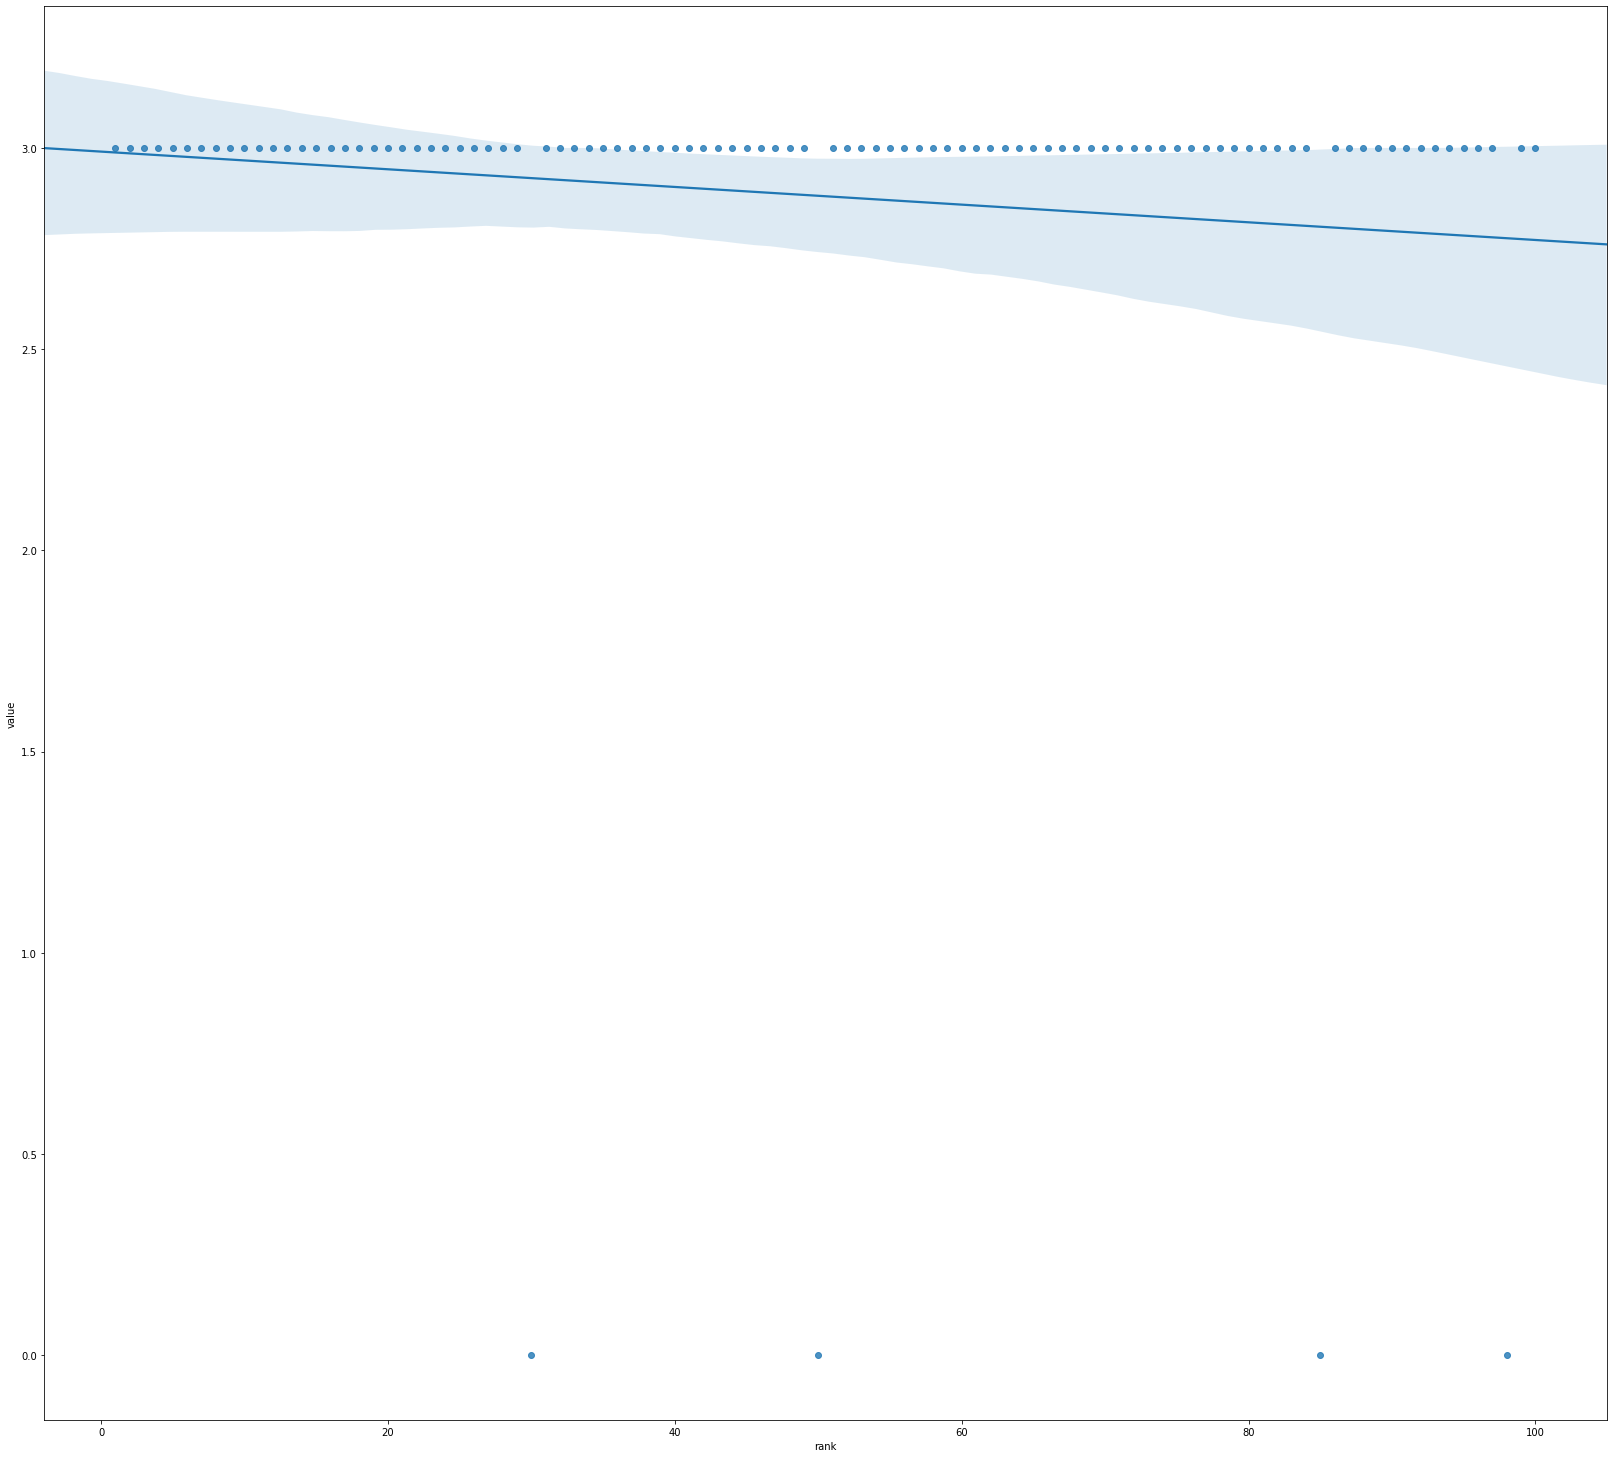

In [82]:
#time_signature

list_of_factors = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

value = []
for j in range(100):
    subvalue = 0
    num = dframe.iloc[j][list_of_factors[12]]
    if num == dframe_factors.iloc[12]['mean']:
        subvalue += 4
    elif dframe_factors.iloc[12]['min_value0.1'] <= num <= dframe_factors.iloc[12]['max_value0.1']:
        subvalue += 3
    elif dframe_factors.iloc[12]['min_value0.2'] <= num <= dframe_factors.iloc[12]['max_value0.2']:
        subvalue += 2
    elif dframe_factors.iloc[12]['min_value0.3'] <= num <= dframe_factors.iloc[12]['max_value0.3']:
        subvalue += 1
    else:
        subvalue += 0
    value.append(subvalue)
    
data = pd.DataFrame({'rank': [i for i in range(1,101)],
                     'value': [i for i in value]})

p = sns.regplot(x='rank',y='value',data=data, fit_reg=True)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
slope_result.append(slope)

After we got the slope of each factors, we will compare with one another and see which show the least amount of slope and which show greater amount of slope.

In [95]:
mylist = []
temporary_list = list(zip(list_of_factors,slope_result))
for i in temporary_list:
    mylist.append(list(i))
arr = np.array(mylist)
dframe_show = pd.DataFrame(arr,index = [i for i in range(1,14)],columns = ['factors','slope'])
dframe_show

,factors,slope
1,danceability,-0.0030903090309030907
2,energy,-1.787454550825269e-18
3,key,-0.0026522652265226526
4,loudness,-2.4002400240023176e-05
5,mode,0.0004380438043804401
6,speechiness,-0.006018601860186015
7,acousticness,-0.0007920792079207929
8,instrumentalness,-0.00018001800180017063
9,liveness,-0.0002820282028202831
10,valence,-0.003492349234923491


In [99]:
dframe_show.sort_values('slope')

,factors,slope
8,instrumentalness,-0.00018001800180017063
9,liveness,-0.0002820282028202831
11,tempo,-0.00034803480348034145
7,acousticness,-0.0007920792079207929
13,time_signature,-0.002196219621962188
3,key,-0.0026522652265226526
1,danceability,-0.0030903090309030907
10,valence,-0.003492349234923491
6,speechiness,-0.006018601860186015
2,energy,-1.787454550825269e-18


From the dataframe above we can see that the most significant negative slopes are held by danceability, key, speechiness, valence, and time_Signature. While the most significant positive values are held by mode and duration_ms. Now let's specify the 2 spectrums by making 2 dataframes for each spectrum.

In [119]:
dframe_negativeSlope = dframe_show.drop([11,2,4,5,7,8,9,12])
dframe_negativeSlope

,factors,slope
1,danceability,-0.0030903090309030907
3,key,-0.0026522652265226526
6,speechiness,-0.006018601860186015
10,valence,-0.003492349234923491
13,time_signature,-0.002196219621962188


In [121]:
dframe_negativeSlope.sort_values('slope')

,factors,slope
13,time_signature,-0.002196219621962188
3,key,-0.0026522652265226526
1,danceability,-0.0030903090309030907
10,valence,-0.003492349234923491
6,speechiness,-0.006018601860186015


From the dataframe above, we know that speechiness ranks the highest among the other factors with negative slopes. Next to the ladder is valence, danceability, key, and followed by time_signature.

In [120]:
dframe_positiveSlope = dframe_show.drop([1,2,3,4,6,7,8,9,10,11,13])
dframe_positiveSlope

,factors,slope
5,mode,0.0004380438043804401
12,duration_ms,0.0009180918091809227


In [122]:
dframe_positiveSlope.sort_values('slope')

,factors,slope
5,mode,0.0004380438043804401
12,duration_ms,0.0009180918091809227


From the dataframe above, we know that duration_ms ranks higher than mode.

From the 2 dataframes above, we understand that the general spotify users prefer songs with higher level of speechiness, valence, danceability, key, and time_signature. They also prefer lower level of duration_ms and mode.